# Ellipsoid Problem

Given an ellipsoid $E_0 = \{x \in \mathbb{R}^p: -x^T Q_0 x + b_0^T x + c_0 \ge 0, Q_0 \in \mathbb{S}^p_+, b_0 \in \mathbb{R}^p, c_0 \in \mathbb{R}\}$, a map $\varphi: \mathbb{R}^p \rightarrow \mathbb{R}^p, x \mapsto \max\{0,Px + \xi\}$. The goal is to find an ellipsoid $E = \{x \in \mathbb{R}^p: -x^T Q x + b^T x + c \ge 0, Q \in \mathbb{S}^p_+, b \in \mathbb{R}^p, c \in \mathbb{R}\}$ such that $\varphi (E_0) \subseteq E$. For the following discussion, the product between two vectors means element-wise product, i.e. $ab := \sum_{i = 1}^n a_i b_i$ for $a, b \in \mathbb{R}^n$.

It is easy to see that for all $x \in \mathbb{R}^p$ such that $-x^T Q_0 x + b_0^T x + c_0 \ge 0$, we have $-\max\{0,Px + \xi\}^T Q \max\{0,Px + \xi\} + b^T \max\{0,Px + \xi\} + c \ge 0$, which is equivalent to $-z^T Q z + b^T z + c \ge 0, z(z-Px - \xi) = 0, z \ge 0, z \ge Px + \xi$.

We have the following polynomial optimization problem:
\begin{align*}
\text{find} & \quad Q, b, c \\
\text{s.t.} & \quad \begin{cases} -x^T Q_0 x + b_0^T x + c_0 \ge 0 \\
-z^T Q z + b^T z + c \ge 0, Q \in \mathbb{S}^p_+ \\
z(z-Px - \xi) = 0, z \ge 0, z \ge Px + \xi \end{cases}
\end{align*}
By maximizing the trace of $Q$, we can use Julia to solve this POP. For simplicity, let $Q_0 = \text{diag}\{1,1\}, b_0 = (0,0)^T, c_0 = 0$.

The $d$-th order SOS problem is
\begin{align*}
\max & \quad \det (Q) ^{\frac{1}{p}} \\
\text{s.t.} & \quad \begin{cases}
-z^T Q z + b^T z + c = \sigma_0 (x, z) +  \sigma_1 (x, z) (-x^T Q_0 x + b_0^T x + c_0) + \tau (x,z)^T (z(z-Px - \xi)) + \sigma_2 (x,z)^T z + \sigma_3 (x,z)^T (z - Px - \xi) \\
\begin{pmatrix}
Q & \frac{1}{2} b \\
\frac{1}{2} b^T & 1-c
\end{pmatrix} \succeq 0, \sigma_1 \text{ SOS}; \sigma_i = [\sigma_i^1, \ldots, \sigma_i^p]^T \text{ SOSs for } i = 2,3; \tau \text{ polynomial}
\end{cases}
\end{align*}

An alternative:
\begin{align*}
\max & \quad \det (Q) ^{\frac{1}{p}} \\
\text{s.t.} & \quad \begin{cases}
-(\frac{z+Px+\xi}{2})^T Q (\frac{z+Px+\xi}{2}) + b^T (\frac{z+Px+\xi}{2}) + c = \sigma_0 (x, z) +  \sigma_1 (x, z) (-x^T Q_0 x + b_0^T x + c_0) + \tau (x,z)^T (z^2-(Px + \xi)^2) + \sigma_2 (x,z)^T z \\
\begin{pmatrix}
Q & \frac{1}{2} b \\
\frac{1}{2} b^T & 1-c
\end{pmatrix} \succeq 0, \sigma_1 \text{ SOS}; \sigma_2 = [\sigma_2^1, \ldots, \sigma_2^p]^T \text{ SOSs}; \tau \text{ polynomial}
\end{cases}
\end{align*}

Instead of propagating the ellipsoids layer by layer, we can also estimate the final outer ellipsoid directly, which leads to the following SOS problem:
\begin{align*}
\max & \quad \det (Q) ^{\frac{1}{p}} \\
\text{s.t.} & \quad \begin{cases}
-x_l^T Q x_l + b^T x_l + c = \sigma_0 (x, x_{1 \ldots l}) +  \sigma_1 (x, x_{1 \ldots l}) (-x^T Q_0 x + b_0^T x + c_0) \\
\qquad \qquad + \tau_1 (x, x_{1 \ldots l})^T (x_1(x_1-P_1 x - \xi_1)) + \sigma_{1,1} (x, x_{1 \ldots l})^T x_1 + \sigma_{1,2} (x, x_{1 \ldots l})^T (x_1 - P_1 x - \xi_1) \\
\qquad \qquad + \tau_2 (x, x_{1 \ldots l})^T (x_2(x_2-P_2 x_1 - \xi_2)) + \sigma_{2,1} (x, x_{1 \ldots l})^T x_2 + \sigma_{2,2} (x, x_{1 \ldots l})^T (x_2 - P_2 x_1 - \xi_2) \\
\qquad \qquad + \ldots \\
\qquad \qquad + \tau_l (x, x_{1 \ldots l})^T (x_l(x_l-P_l x_{l-1} - \xi_l)) + \sigma_{l,1} (x, x_{1 \ldots l})^T x_l + \sigma_{l,2} (x, x_{1 \ldots l}, x_{1 \ldots l})^T (x_l - P_l x_{l-1} - \xi_l) \\
\begin{pmatrix}
Q & \frac{1}{2} b \\
\frac{1}{2} b^T & 1-c
\end{pmatrix} \succeq 0, \sigma_0, \sigma_1, \sigma_{i,j} = [\sigma_{i,j}^1, \ldots, \sigma_{i,j}^{p_i}]^T \text{ SOSs}, \tau_i = [\tau_i^1, \ldots, \tau_i^{p_i}]^T \text{ polynomials}
\end{cases}
\end{align*}

The goal is to beat Morari, by applying multi-order and sublevel hierarchy either to the propagation SOS problem or the single-shot SOS problem. We use a heuristic $s$-sublevel (choose the sublevels by order) as follows: $\{x^1, \ldots, x^s\}$ for input ellipsoid $-x^T Q_0 x + b_0^T x + c_0$, $\{x_{i-1}^1, \ldots, x_{i-1}^{s}, z_i^j\}$ for ReLU constraints $z_i^j (z_i^j-P_i^{j,:} x_{i-1} - \xi_i^j)$, $z_i^j-P_i^{j,:} x_{i-1} - \xi_i^j$ and $z_i^j$. The 2nd-order $s$-sublevel hierarchy for ellipsoid problem reads as follows:
\begin{align*}
\max & \quad \det (Q) ^{\frac{1}{p}} \\
\text{s.t.} & \quad \begin{cases}
-x_l^T Q x_l + b^T x_l + c = \sigma_0 (x, x_{1 \ldots l}) + \sigma_{0,0} (x^{1\ldots s}) + \sigma_1 (x^{1\ldots s}) (-x^T Q_0 x + b_0^T x + c_0) \\
\qquad \qquad + \sigma_{1,0} (x^{1\ldots s}, x_1)^T \mathbf{1}_{p_1} + \tau_1 (x^{1\ldots s}, x_1)^T (x_1(x_1-P_1 x - \xi_1)) + \sigma_{1,1} (x^{1\ldots s}, x_1)^T x_1 + \sigma_{1,2} (x^{1\ldots s}, x_1)^T (x_1 - P_1 x - \xi_1) \\
\qquad \qquad + \sigma_{2,0} (x_1^{1\ldots s}, x_2) \mathbf{1}_{p_2} + \tau_2 (x_1^{1\ldots s}, x_2)^T (x_2(x_2-P_2 x_1 - \xi_2)) + \sigma_{2,1} (x_1^{1\ldots s}, x_2)^T x_2 + \sigma_{2,2} (x_1^{1\ldots s}, x_2)^T (x_2 - P_2 x_1 - \xi_2) \\
\qquad \qquad + \ldots \\
\qquad \qquad + \sigma_{l,0} (x_{l-1}^{1\ldots s}, x_l) \mathbf{1}_{p_l} + \tau_l (x_{l-1}^{1\ldots s}, x_l)^T (x_l(x_l-P_l x_{l-1} - \xi_l)) + \sigma_{l,1} (x_{l-1}^{1\ldots s}, x_l)^T x_l + \sigma_{l,2} (x_{l-1}^{1\ldots s}, x_l)^T (x_l - P_l x_{l-1} - \xi_l) \\
\begin{pmatrix}
Q & \frac{1}{2} b \\
\frac{1}{2} b^T & 1-c
\end{pmatrix} \succeq 0, \sigma_0, \sigma_1, \sigma_{i,j} = [\sigma_{i,j}^1 (x_{i-1}^{1\ldots s}, x_i^1), \ldots, \sigma_{i,j}^{p_i} (x_{i-1}^{1\ldots s}, x_i^{p_i})]^T \text{ SOSs}, \tau_i = [\tau_i^1 (x_{i-1}^{1\ldots s}, x_i^1), \ldots, \tau_i^{p_i} (x_{i-1}^{1\ldots s}, x_i^{p_i})]^T \text{ polynomials}
\end{cases}
\end{align*}

# Morari = Shor
## QC for hyper-rectangle
The hyper-rectangle $\mathcal{X} = \{x \in \mathbb{R}^d: \underline{x} \le x \le \overline{x}\}$ satisfies the QC defined by
$$P = \begin{bmatrix}-(\Gamma+\Gamma^T) & \Gamma \underline{x} + \Gamma^T \overline{x} \\
\underline{x}^T \Gamma^T + \overline{x}^T \Gamma & - \underline{x}^T \Gamma^T \overline{x} - \overline{x}^T \Gamma \underline{x} \end{bmatrix}$$
where $\Gamma \in \mathbb{R}^{d\times d}, \Gamma_{ij} \ge 0 $ for all $i, j$. This is equivalent to say that
$$\sum_{i,j} \Gamma_{ij} (x_i - \underline{x}_i) (\overline{x}_j - x_j) \ge 0$$

## QC for ReLU function
The ReLU function $y=\max\{0, x\}$ satisfies the QC defined by
$$Q = \begin{bmatrix}
\mathbf{0}_{d\times d} & T & -\nu \\
T & -2T & \nu + \eta \\
-\nu^T & \nu^T + \eta^T & 0
\end{bmatrix}$$
where $\eta, \nu \ge 0$ and $T \in \mathbb{S}^d_+$ given by
$$T = \sum_{i = 1}^d \lambda_i e_i e_i^T + \sum_{i < j} \lambda_{ij} (e_i - e_j) (e_i - e_j)^T$$
with $\lambda_i \in \mathbb{R}$ and $\lambda_{ij} \ge 0$. This is equivalent to say that
$$\sum_{i = 1}^d 2 \lambda_i (x_i y_i - y_i^2) + \nu_i (y_i - x_i) + \eta_i y_i - \sum_{i < j} \lambda_{ij} \big((y_j - y_i)^2 - (y_j - y_i)(x_j - x_i)\big) \ge 0$$

## QC for polytope
A polytope $\mathcal{X} = \{x\in \mathbb{R}^d : Ax \le b\}$ satisfies the QC defined by
$$P = \begin{bmatrix}A^T \Gamma A & -A^T \Gamma b \\
-b^T \Gamma A & b^T \Gamma b\end{bmatrix}$$
where $\Gamma \in \mathbb{S}^d, \Gamma \ge 0$. This is equivalent to say that
$$\sum_{i,j} \Gamma_{ij} (b_i - A_{i,:} x) (b_j - A_{j,:} x) \ge 0$$

## QC for ellipsoid
An ellipsoid $\mathcal{X} = \{x \in\mathbb{R}^d: ||Ax + b||_2 \le 1\}$ satisfies the QC defined by
$$P = \mu \begin{bmatrix}
-A^T A & -A^T b\\
-b^T A & 1- b^T b\end{bmatrix}$$
where $\mu \ge 0$. This is equivalent to say that
$$\mu (1- ||Ax + b||_2^2) \ge 0$$

## QC for polytopic reachable set
A polytope $\mathcal{X} =\{x \in \mathbb{R}^d: Ax \le b\} = \cap_{i = 1}^d \{x \in \mathbb{R}^d: A_{i,:} x \le b_i\}$ satisfies the QC defined by
$$S_i = \begin{bmatrix}\mathbf{0}_{d\times d}& A_{i,:}^T \\ A_{i,:} & -2b_i\end{bmatrix}$$
where $A$ (which determines the orientation of each facet of the polytope) is given, $b$ is decision variable. This is equivalent to say that
$$2 A_{i,:} x - 2 b_i \le 0$$

## QC for ellipsoidal reachable set
An ellipsoid $\mathcal{X} = \{x \in\mathbb{R}^d: ||Ax + b||_2 \le 1\}$ satisfies the QC defined by
$$P = \begin{bmatrix}
A^T A & A^T b\\
b^T A & b^T b - 1\end{bmatrix}$$
where $A,b$ are decision variables. This is equivalent to say that 
$$||Ax + b||_2^2 - 1 \le 0$$

## Conclusion
The first-order moment relaxation (Shor's relaxation) reads:
$$-\sigma_0 (x, z) = \underbrace{\overbrace{z^T Q z - b^T z - c}^{p_1(x,z)} + \overbrace{\sigma_1 (-x^T Q_0 x + b_0^T x + c_0)}^{p_2(x,z)} + \overbrace{\tau^T (z(z-Px - \xi))}^{p_3(x,z)} + \overbrace{\sigma_2^T z}^{p_4(x,z)} + \overbrace{\sigma_3^T (z - Px - \xi)}^{p_5(x,z)}}_{q(x,z)} =: \begin{bmatrix}x\\z\\1\end{bmatrix}^T M \begin{bmatrix}x\\z\\1\end{bmatrix}$$
where $M$ is the Gram matrix of $q(x,z)$ with basis $(x^T,z^T,1)$, $\sigma_0$ is an SOS of degree 2, $\sigma_1 \in \mathbb{R}_+, \tau \in \mathbb{R}^{p_1}, \sigma_2 \in \mathbb{R}^{p_1}_+, \sigma_3 \in \mathbb{R}^{p_1}_+$. Precisely, $M = M_1 + M_2 + M_3 + M_4 + M_5$, where
$$M_1 = \begin{bmatrix}
\mathbf{0}_{p\times p} & \mathbf{0}_{p\times p_1} & \mathbf{0}_{p\times 1} \\
\mathbf{0}_{p_1 \times p} & Q & -\frac{1}{2} b \\
\mathbf{0}_{1 \times p} & -\frac{1}{2} b^T & -c \end{bmatrix}$$
is the Gram matrix of polynomial $p_1(x,z) = z^T Q z - b^T z - c$ with basis $(x^T,z^T,1)$,
$$M_2 = \sigma_1 \begin{bmatrix}
-Q_0 & \mathbf{0}_{p\times p_1} & \frac{1}{2} b_0 \\
\mathbf{0}_{p_1 \times p} & \mathbf{0}_{p_1 \times p_1} & \mathbf{0}_{p_1 \times 1} \\
\frac{1}{2} b_0^T & \mathbf{0}_{1\times p_1} & c_0 \\
\end{bmatrix}$$
is the Gram matrix of polynomial $p_2(x,z) = \sigma_1 (-x^T Q_0 x + b_0^T x + c_0)$ with basis $(x^T,z^T,1)$,
$$M_3 = \begin{bmatrix}
\mathbf{0}_{p\times p} & -\frac{1}{2} P^T \text{diag}(\tau) & \mathbf{0}_{p\times 1} \\
-\frac{1}{2} \text{diag}(\tau) P & \text{diag}(\tau) & -\frac{1}{2} (\tau \xi) \\
\mathbf{0}_{1 \times p} & -\frac{1}{2} (\tau^T \xi^T) & 0
\end{bmatrix}$$
is the Gram matrix of polynomial $p_3(x,z) = \tau z(z-Px - \xi)$ with basis $(x^T,z^T,1)$,
$$M_4 = \begin{bmatrix}
\mathbf{0}_{p\times p} & \mathbf{0}_{p\times p_1} & \mathbf{0}_{p\times 1} \\
\mathbf{0}_{p_1 \times p} & \mathbf{0}_{p_1 \times p_1} & \frac{1}{2} \sigma_2 \\
\mathbf{0}_{1 \times p} & \frac{1}{2} \sigma_2^T & 0
\end{bmatrix}$$
is the Gram matrix of polynomial $p_4(x,z) = \sigma_2 z$ with basis $(x^T,z^T,1)$,
$$M_5 = \begin{bmatrix}
\mathbf{0}_{p\times p} & \mathbf{0}_{p\times p_1} & -\frac{1}{2} P^T \sigma_3 \\
\mathbf{0}_{p_1 \times p} & \mathbf{0}_{p_1 \times p_1} & \frac{1}{2} \sigma_3 \\
-\frac{1}{2} \sigma_3^T P & \frac{1}{2} \sigma_3^T & -\sigma_3^T \xi
\end{bmatrix}$$
is the Gram matrix of polynomial $p_5(x,z) = \sigma_3 (z - Px - \xi)$ with basis $(x^T,z^T,1)$.

If we add the redundant constraints $(z_j - z_i)^2 - (z_j - z_i) (P_{j,:} x + \xi_j - P_{i,:} x - \xi_i) \le 0$ for $i<j$. Then we just need to add additional polynomials $-\sum_{i<j} \Lambda_{ij} ((z_j - z_i)^2 - (z_j - z_i) (P_{j,:} x + \xi_j - P_{i,:} x - \xi_i))$ with $\Lambda \ge 0$, correspondingly, add its Gram matrix $M_6$ to $M$:
$$M_6 = \begin{bmatrix}
\mathbf{0}_{p\times p} & \frac{1}{2} P^T T & \mathbf{0}_{p\times 1} \\
\frac{1}{2} T P & -T & \frac{1}{2} T \xi \\
\mathbf{0}_{1 \times p} & \frac{1}{2} \xi^T T & 0
\end{bmatrix}$$
with $T = \sum_{i<j} \Lambda_{ij} (\mathbf{e}_i - \mathbf{e}_j) (\mathbf{e}_i - \mathbf{e}_j)^T$ and $\mathbf{e}_i$ are the canonical basis in $\mathbb{R}^p$.

Then Morari's method (applied to the ellipsoid problem) is essentially the following SDP problem:
\begin{align*}
\max & \quad \det (Q) ^{\frac{1}{p}} \\
\text{s.t.} & \quad
M \preceq 0, 
\begin{pmatrix}
Q & \frac{1}{2} b \\
\frac{1}{2} b^T & 1-c
\end{pmatrix} \succeq 0
\end{align*}
We can see that Morari's method is just a different reformulation of Shor's relaxation.

# Theorem (Image of an Ellipsoid by an Affine Map)
Let $E = \{x \in \mathbb{R}^p: -x^T Q x + b^T x + c \ge 0, Q \in \mathbb{S}^p_+, b \in \mathbb{R}^p, c \in \mathbb{R}\}$ be an ellipsoid in $\mathbb{R}^p$. Define an affine map $\mathcal{A}: \mathbb{R}^p \rightarrow \mathbb{R}^q$, $x \mapsto z = Px+\xi$, where $P \in \mathbb{R}^{q \times p}, \xi \in \mathbb{R}^q$. Then the image of $E$ under $\mathcal{A}$ is:

i) An ellipsoid in $\mathbb{R}^q$, if $\text{rank}(P) = q$;

ii) An ellipsoid in a subspace of $\mathbb{R}^q$, if $\text{rank}(P) < q$, where the dimension of the subspace equals to $\text{rank}(P)$.

The way to determine the image of the ellipsoid $E$ under $\mathcal{A}$ is as follows. Let $P = U \Sigma V^T$ be the SVD decomposition of $P$. Denote by 
$$U = \begin{pmatrix} U_r & U_{q-r} \end{pmatrix}, \Sigma = \begin{pmatrix} \Sigma_r & \mathbf{0}_{r, p-r} \\ \mathbf{0}_{q-r, r} & \mathbf{0}_{q-r, p-r} \end{pmatrix}, V^T = \begin{pmatrix} V_r^T \\ V_{p-r}^T \end{pmatrix}$$
where $\Sigma_r = \text{diag} \{\lambda_1, \ldots, \lambda_r\}, \lambda_i \ne 0, i = 1, \ldots, r, r = \text{rank}(P)$. Note that $P = U \Sigma V^T = U_r \Sigma_r V_r^T$. Denote by $P^{(-1)} = V_r \Sigma_r^{-1} U_r^T$ and $P^{(-T)} = U_r \Sigma_r^{-1} V_r^T$. Then, the image of $E$ under $\mathcal{A}$ satisfying the following equation:
$$\begin{cases} -(z - \xi)^T Q' (z - \xi) + b'^T (z - \xi) + c \ge 0 \\
U_{q-r}^T (z - \xi) = 0\end{cases}$$
with $Q' = P^{(-T)} Q P^{(-1)}, b' = P^{(-T)} b$.

In [106]:
using Plots
using SumOfSquares
using DynamicPolynomials
using MosekTools
using LinearAlgebra
using Printf
using MathOptInterface

# compute the outer approximation ellipsoid
function OuterApproximation(Q0, b0, c0, ord, P, ξ, method)
    p1 = size(P, 2); p2 = size(P, 1)
    model = SOSModel(with_optimizer(Mosek.Optimizer))
    # objective variable
    Q = @variable(model, [1:p2, 1:p2], Symmetric);
    b = @variable(model, [1:p2, 1:1]);
    c = @variable(model, [1:1, 1:1]);
    if isequal(method, "tong")
        @polyvar x[1:p1] z[1:p2] lower_bound
        @variable(model, lower_bound)
        @objective(model, Max, lower_bound)
        Mat = [-Q b/2; b'/2 1-c[1]];
        vect = lower_bound
        for i = 1:p2
            vect = hcat(vect, -Q[i,i:p2]')
        end
        @constraints(model, begin
            Mat in PSDCone()
            vect[:] in MOI.RootDetConeTriangle(p2)
        end)
        X0 = monomials([x; z], 0:2*ord); σ0 = @variable(model, [1:1], Poly(X0))
        X1 = monomials([x; z], 0:2*(ord-1)); σ1 = @variable(model, [1:1], Poly(X1))
        obj = z'*Q*z.+b'*z.+c - σ0[1] - σ1[1] * (x'*Q0*x.+b0'*x.+c0)
        Λ = @variable(model, [1:p2,1:p2], Symmetric)
        for i = 1:p2-1
            for j = i+1:p2
                obj = obj + Λ[i,j]*((z[j] - z[i])^2 - (z[j] - z[i])*(P[j,:]'*x + ξ[j] - P[i,:]'*x - ξ[i]))
            end
        end
        @constraints(model, begin
            σ0 .>= 0; σ1 .>= 0; Λ .>= 0
        end)
        for i = 1:p2
            X2 = monomials([x; z], 0:2*(ord-1)); σ2 = @variable(model, [1:1], Poly(X2))
            X3 = monomials([x; z], 0:2*(ord-1)); σ3 = @variable(model, [1:1], Poly(X3))
            X4 = monomials([x; z], 0:2*(ord-1)); σ4 = @variable(model, [1:1], Poly(X4))
            obj = obj - σ2[1] * (z[i]*(z[i]-P[i,:]'*x-ξ[i])) - σ3[1] * z[i] - σ4[1] * (z[i]-P[i,:]'*x-ξ[i])
            @constraints(model, begin
                σ3 .>= 0; σ4 .>= 0;
            end)
        end
        # println("Shor:")
        # println((-obj-σ0[1])[1])
        @constraint(model, obj .== 0)
    elseif isequal(method, "split")
        @polyvar x[1:p2] z[1:p2] lower_bound
        @variable(model, lower_bound)
        @objective(model, Max, lower_bound)
        Mat = [-Q b/2; b'/2 1-c[1]];
        vect = lower_bound
        for i = 1:p2
            vect = hcat(vect, -Q[i,i:p2]')
        end
        @constraints(model, begin
            Mat in PSDCone()
            vect[:] in MOI.RootDetConeTriangle(p2)
        end)
        X0 = monomials([x; z], 0:2*ord); σ0 = @variable(model, [1:1], Poly(X0))
        X1 = monomials([x; z], 0:2*(ord-1)); σ1 = @variable(model, [1:1], Poly(X1))
        D = svd(P); Q0 = D.U*diagm(D.S)^(-1)*D.V'*Q0*D.V*diagm(D.S)^(-1)*D.U'; b0 = D.U*diagm(D.S)^(-1)*D.V'*b0; c0 = c0
        obj = z'*Q*z.+b'*z.+c - σ0[1] - σ1[1] * ((x-ξ)'*Q0*(x-ξ).+b0'*(x-ξ).+c0)
        Λ = @variable(model, [1:p2,1:p2], Symmetric)
        for i = 1:p2-1
            for j = i+1:p2
                obj = obj + Λ[i,j]*((z[j] - z[i])^2 - (z[j] - z[i])*(x[j] - x[i]))
            end
        end
        @constraints(model, begin
            σ0 .>= 0; σ1 .>= 0; Λ .>= 0
        end)
        for i = 1:p2
            X2 = monomials([x; z], 0:2*(ord-1)); σ2 = @variable(model, [1:1], Poly(X2))
            X3 = monomials([x; z], 0:2*(ord-1)); σ3 = @variable(model, [1:1], Poly(X3))
            X4 = monomials([x; z], 0:2*(ord-1)); σ4 = @variable(model, [1:1], Poly(X4))
            obj = obj - σ2[1] * (z[i]*(z[i]-x[i])) - σ3[1] * z[i] - σ4[1] * (z[i]-x[i])
            @constraints(model, begin
                σ3 .>= 0; σ4 .>= 0;
            end)
        end
        @constraint(model, obj .== 0)
    elseif isequal(method, "jean")
        @polyvar x[1:p1] z[1:p2] lower_bound
        @variable(model, lower_bound)
        @objective(model, Max, lower_bound)
        Mat = [-Q b/2; b'/2 1-c[1]];
        vect = lower_bound
        for i = 1:p2
            vect = hcat(vect, -Q[i,i:p2]')
        end
        @constraints(model, begin
            Mat in PSDCone()
            vect[:] in MOI.RootDetConeTriangle(p2)
        end)
        X0 = monomials([x; z], 0:2*ord); σ0 = @variable(model, [1:1], Poly(X0))
        X1 = monomials([x; z], 0:2*(ord-1)); σ1 = @variable(model, [1:1], Poly(X1))
        obj = 1/4*(z+P*x+ξ)'*Q*(z+P*x+ξ).+1/2*b'*(z+P*x+ξ).+c - σ0[1] - σ1[1] * (x'*Q0*x.+b0'*x.+c0)
        @constraints(model, begin
            σ0 .>= 0; σ1 .>= 0;
        end)
        for i = 1:p2
            X2 = monomials([x; z], 0:2*(ord-1)); σ2 = @variable(model, [1:1], Poly(X2))
            X3 = monomials([x; z], 0:2*(ord-1)); σ3 = @variable(model, [1:1], Poly(X3))
            obj = obj - σ2[1] * (z[i]^2-(P[i,:]'*x+ξ[i])^2) - σ3[1] * z[i]
            @constraints(model, begin
                σ3 .>= 0;
            end)
        end
        @constraint(model, obj .== 0)
    elseif isequal(method, "hr-2")
        @polyvar x[1:p2] z[1:p2] lower_bound
        @variable(model, lower_bound)
        @objective(model, Max, lower_bound)
        Mat = [-Q b/2; b'/2 1-c[1]];
        vect = lower_bound
        for i = 1:p2
            vect = hcat(vect, -Q[i,i:p2]')
        end
        @constraints(model, begin
            Mat in PSDCone()
            vect[:] in MOI.RootDetConeTriangle(p2)
        end)
        X0 = monomials([x; z], 0:2*1); σ0 = @variable(model, [1:1], Poly(X0))
        X01 = monomials(x, 0:2*ord); σ01 = @variable(model, [1:1], Poly(X01))
        X1 = monomials(x, 0:2*(ord-1)); σ1 = @variable(model, [1:1], Poly(X1))
        obj = z'*Q*z.+b'*z.+c - σ0[1] - σ01[1] - σ1[1] * (x'*Q0*x.+b0'*x.+c0)
        Λ = @variable(model, [1:p2,1:p2], Symmetric)
        for i = 1:p2-1
            for j = i+1:p2
                if i != j
                    obj = obj + Λ[i,j]*((z[j] - z[i])^2 - (z[j] - z[i])*(P[j,:]'*x + ξ[j] - P[i,:]'*x - ξ[i]))
                end
            end
        end
        @constraints(model, begin
            σ0 .>= 0; σ01 .>= 0; σ1 .>= 0; Λ .>= 0
        end)
        for i = 1:p2
            X02 = monomials([x[i]; z[i]], 0:2*ord); σ02 = @variable(model, [1:1], Poly(X02))
            X2 = monomials([x[i]; z[i]], 0:2*(ord-1)); σ2 = @variable(model, [1:1], Poly(X2))
            X3 = monomials([x[i]; z[i]], 0:2*(ord-1)); σ3 = @variable(model, [1:1], Poly(X3))
            X4 = monomials([x[i]; z[i]], 0:2*(ord-1)); σ4 = @variable(model, [1:1], Poly(X4))
            obj = obj - σ02[1] - σ2[1] * (z[i]*(z[i]-P[i,:]'*x-ξ[i])) - σ3[1] * z[i] - σ4[1] * (z[i]-P[i,:]'*x-ξ[i])
            @constraints(model, begin
                σ02 .>= 0; σ3 .>= 0; σ4 .>= 0;
            end)
        end
        @constraint(model, obj .== 0)
    end
    # solve
    MOI.set(model, MOI.Silent(), true);
    optimize!(model)
    @printf("Termination status: %s, primal status: %s, dual status: %s.\n", termination_status(model), primal_status(model), dual_status(model))
    # println(value.(Q)); println(value.(b)); println(value.(c))
    # return value.(-Q*Q), value.(-2 .* Q*b), value.(1 .- b'*b)
    return value.(Q), value.(b), value.(c)
end

function OuterApproximationSublevel(Q0, b0, c0, P, ξ, lv)
    l = length(P);
    p = Int.(zeros(l+1,1)); p[1] = size(P[1],2); 
    for i = 1:l
        p[i+1] = size(P[i],1)
    end
    dx = Int.(zeros(l+2,1));
    for i = 1:l+1
        dx[i+1] = sum(p[1:i]);
    end
    model = SOSModel(with_optimizer(Mosek.Optimizer))
    # objective variable
    Q = @variable(model, [1:p[l+1], 1:p[l+1]], Symmetric);
    b = @variable(model, [1:p[l+1], 1:1]);
    c = @variable(model, [1:1, 1:1]);
    @polyvar lower_bound
    @variable(model, lower_bound)
    @objective(model, Max, lower_bound)
    Mat = [-Q b/2; b'/2 1-c[1]];
    vect = lower_bound
    for i = 1:p[l+1]
        vect = hcat(vect, -Q[i,i:p[l+1]]')
    end
    @constraints(model, begin
        Mat in PSDCone()
        vect[:] in MOI.RootDetConeTriangle(p[l+1])
    end)
    @polyvar x[1:dx[l+2]]
    X0 = monomials(x, 0:2*1); σ0 = @variable(model, [1:1], Poly(X0))
    X00 = monomials(x[1:lv], 0:2*2); σ00 = @variable(model, [1:1], Poly(X00))
    X1 = monomials(x[1:lv], 0:2*1); σ1 = @variable(model, [1:1], Poly(X1))
    obj = x[dx[l+1]+1:dx[l+2]]'*Q*x[dx[l+1]+1:dx[l+2]].+b'*x[dx[l+1]+1:dx[l+2]].+c - σ0[1] - σ00[1] - σ1[1] * (x[1:dx[2]]'*Q0*x[1:dx[2]].+b0'*x[1:dx[2]].+c0)
    @constraints(model, begin
        σ0 .>= 0; σ00 .>= 0; σ1 .>= 0;
    end)
    for i = 1:l
        for j = 1:p[i+1]
            X00 = monomials([x[dx[i+1]-lv+1:dx[i+1]]; x[dx[i+1]+j]], 0:2*2); σ00 = @variable(model, [1:1], Poly(X00));
            X1 = monomials([x[dx[i+1]-lv+1:dx[i+1]]; x[dx[i+1]+j]], 0:2*1); σ1 = @variable(model, [1:1], Poly(X1));
            X2 = monomials([x[dx[i+1]-lv+1:dx[i+1]]; x[dx[i+1]+j]], 0:2*1); σ2 = @variable(model, [1:1], Poly(X2));
            X3 = monomials([x[dx[i+1]-lv+1:dx[i+1]]; x[dx[i+1]+j]], 0:2*1); σ3 = @variable(model, [1:1], Poly(X3));
            obj = obj - σ00[1] - σ1[1] * (x[dx[i+1]+j]*(x[dx[i+1]+j]-P[i][j,:]'*x[dx[i]+1:dx[i+1]]-ξ[i][j])) - σ2[1] * x[dx[i+1]+j] - σ3[1] * (x[dx[i+1]+j]-P[i][j,:]'*x[dx[i]+1:dx[i+1]]-ξ[i][j])
            @constraints(model, begin
                σ00 .>= 0; σ2 .>= 0; σ3 .>= 0;
            end)
        end
        for j = 1:p[i+1]-1
            for k = j+1:p[i+1]
                X00 = monomials([x[dx[i+1]-lv+1:dx[i+1]]; x[dx[i+1]+j]], 0:2*2); σ00 = @variable(model, [1:1], Poly(X00));
                X1 = monomials([x[dx[i+1]-lv+1:dx[i+1]]; x[dx[i+1]+j]], 0:2*1); σ1 = @variable(model, [1:1], Poly(X1));
                obj = obj - σ00[1] + σ1[1]*((x[dx[i+1]+k] - x[dx[i+1]+j])^2 - (x[dx[i+1]+k] - x[dx[i+1]+j])*(P[i][k,:]'*x[dx[i]+1:dx[i+1]] + ξ[i][k] - P[i][j,:]'*x[dx[i]+1:dx[i+1]] - ξ[i][j]))
                @constraints(model, begin
                    σ00 .>= 0; σ1 .>= 0
                end)
            end
        end
    end
    @constraint(model, obj .== 0)
    # solve
    MOI.set(model, MOI.Silent(), true);
    optimize!(model)
    @printf("Termination status: %s, primal status: %s, dual status: %s.\n", termination_status(model), primal_status(model), dual_status(model))
    # println(value.(Q)); println(value.(b)); println(value.(c))
    # return value.(-Q*Q), value.(-2 .* Q*b), value.(1 .- b'*b)
    return value.(Q), value.(b), value.(c)
end

# compute the outer approximation ellipsoid
function OuterApproximationMorari(Q0, b0, c0, P, ξ)
    l = length(P);
    p = Int.(zeros(l+1,1)); p[1] = size(P[1],2); d = 0;
    for i = 1:l
        p[i+1] = size(P[i],1)
        d = d + p[i]
    end
    model = Model(with_optimizer(Mosek.Optimizer))
    # objective variable
    Q = @variable(model, [1:p[l+1], 1:p[l+1]], Symmetric);
    b = @variable(model, [1:p[l+1], 1:1]);
    c = @variable(model, [1:1, 1:1]);
    μ = @variable(model, [1:1, 1:1]);
    ν = @variable(model, [1:d-p[1]+p[l+1], 1:1]);
    η = @variable(model, [1:d-p[1]+p[l+1], 1:1]);
    λ = @variable(model, [1:d, 1:1]);
    Λ = @variable(model, [1:d, 1:d]);
    # matrix components
    M1 = μ.*[Q0 1/2*b0; 1/2*b0' c0];
    B_M1 = [Matrix(I(p[1])) zeros(p[1],d-p[1]+p[l+1]+1); zeros(1,d+p[l+1]) 1];
    M1 = B_M1'*M1*B_M1;
    #
    E = Matrix(I(d-p[1]+p[l+1])); T = zeros(d-p[1]+p[l+1],d-p[1]+p[l+1]);
    for i = 1:d-p[1]+p[l+1]
        T = T + λ[i].*E[i,:]*E[i,:]'
    end
    for i = 1:d-p[1]+p[l+1]-1
        for j = i+1:d-p[1]+p[l+1]
            T = T + Λ[i,j].*(E[i,:] - E[j,:])*(E[i,:] - E[j,:])'
        end
    end
    M2 = [zeros(d-p[1]+p[l+1],d-p[1]+p[l+1]) T -ν; T -2*T ν+η; -ν' ν'+η' 0];
    B_M2 = [P[1] zeros(p[2],sum(p[2:end])) ξ[1]];
    for i = 1:l-1
        B_M2 = vcat(B_M2, [zeros(p[i+2],sum(p[1:i])) P[i+1] zeros(p[i+2],sum(p[i+2:end])) ξ[i+1]])
    end
    B_M2 = vcat(B_M2, [zeros(d-p[1]+p[l+1],p[1]) Matrix(I(d-p[1]+p[l+1])) zeros(d-p[1]+p[l+1],1); zeros(1,d+p[l+1]) 1])
    M2 = B_M2'*M2*B_M2
    #
    # S = [-Q -1/2*b; -1/2*b' -c[1]];
    # B_S = [zeros(p[l+1],d) P[l] zeros(p[l+1],1); zeros(1,d+p[l+1]) 1];
    # S = B_S'*S*B_S
    e = [zeros(d+p[l+1],1); 1];
    M = [[M1+M2-e*e' [zeros(d,p[l+1]); Matrix(I(p[l+1]))*Q; b']]; [zeros(p[l+1],d) Q*Matrix(I(p[l+1])) b -Matrix(I(p[l+1]))]];
    @variable(model, lower_bound)
    @objective(model, Max, lower_bound)
    vect = lower_bound
    for i = 1:p[l+1]
        vect = hcat(vect, -Q[i,i:p[l+1]]')
    end
    @constraints(model, begin
        μ .>= 0
        ν .>= 0
        η .>= 0
        Λ .>= 0
        vect[:] in MOI.RootDetConeTriangle(p[l+1])
        -M in PSDCone()
    end)
    # -M in PSDCone()
    # -M1-M2-M3-M4-M5 in PSDCone()
    # solve
    MOI.set(model, MOI.Silent(), true);
    optimize!(model)
    @printf("Termination status: %s, primal status: %s, dual status: %s.\n", termination_status(model), primal_status(model), dual_status(model))
    # println(value.(Q)); println(value.(b)); println(value.(c))
    return value.(-Q*Q), value.(-2 .* Q*b), value.(1 .- b'*b)
    # return value.(Q), value.(b), value.(c)
end

function OuterApproximationFazlyab(Q0, b0, c0, P, ξ)
    p1 = size(P[1], 2); p2 = size(P[1], 1)
    model = Model(with_optimizer(Mosek.Optimizer))
    # objective variable
    Q = @variable(model, [1:p2, 1:p2], Symmetric);
    b = @variable(model, [1:p2, 1:1]);
    c = @variable(model, [1:1, 1:1]);
    λ1 = @variable(model, [1:1, 1:1]);
    λ2 = @variable(model, [1:p2, 1:1]);
    λ3 = @variable(model, [1:p2, 1:1]);
    λ4 = @variable(model, [1:p2, 1:1]);
    Λ = @variable(model, [1:p2, 1:p2]);
    # matrix components
    M1 = [zeros(p1,p1+p2+1); zeros(p2,p1) -Q -1/2*b; zeros(1,p1) -1/2*b' -c[1]];
    M2 = λ1.*[Q0 zeros(p1,p2) 1/2*b0; zeros(p2,p1+p2+1); 1/2*b0' zeros(1,p2) c0];
    M3 = [zeros(p1,p1) -1/2*P[1]'*diagm(λ2[:]) zeros(p1,1); -1/2*diagm(λ2[:])*P[1] diagm(λ2[:]) -1/2*(λ2 .* ξ[1]); zeros(1,p1) -1/2*(λ2' .* ξ[1]') 0];
    M4 = [zeros(p1,p1+p2+1); zeros(p2,p1+p2) 1/2*λ3; zeros(1,p1) 1/2*λ3' 0];
    M5 = [zeros(p1,p1+p2) -1/2*P[1]'*λ4; zeros(p2,p1+p2) 1/2*λ4; -1/2*λ4'*P[1] 1/2*λ4' -λ4'*ξ[1]];
    E = Matrix(I(p2)); T = zeros(p2,p2);
    for i = 1:p2-1
        for j = i+1:p2
            T = T + Λ[i,j].*(E[i,:] - E[j,:])*(E[i,:] - E[j,:])'
        end
    end
    M = M1+M2+M3+M4+M5+[zeros(p1,p1) 1/2*P[1]'*T zeros(p1,1); 1/2*T*P[1] -T 1/2*T*ξ[1]; zeros(1,p1) 1/2*ξ[1]'*T 0]
    # M = [[M2+M3+M4+M5+[zeros(p1,p1) 1/2*P[1]'*T zeros(p1,1); 1/2*T*P[1] -T 1/2*T*ξ[1]; zeros(1,p1) 1/2*ξ[1]'*T 0]-e*e' [zeros(p1,p2); I(p2)*Q; b']]; [zeros(p2,p1) Q*I(p2) b -Matrix(I(p2))]];
    @variable(model, lower_bound)
    @objective(model, Max, lower_bound)
    Mat = [-Q b/2; b'/2 1-c[1]];
    vect = lower_bound
    for i = 1:p2
        vect = hcat(vect, -Q[i,i:p2]')
    end
    @constraints(model, begin
        λ1 .>= 0
        λ3 .>= 0
        λ4 .>= 0
        Λ .>= 0
        Mat in PSDCone()
        vect[:] in MOI.RootDetConeTriangle(p2)
        -M in PSDCone()
    end)
    # -M in PSDCone()
    # -M1-M2-M3-M4-M5 in PSDCone()
    # solve
    MOI.set(model, MOI.Silent(), true);
    optimize!(model)
    @printf("Termination status: %s, primal status: %s, dual status: %s.\n", termination_status(model), primal_status(model), dual_status(model))
    # println(value.(Q)); println(value.(b)); println(value.(c))
    # return value.(-Q*Q), value.(-2 .* Q*b), value.(1 .- b'*b)
    return value.(Q), value.(b), value.(c)
end

# plot the ellipsoid
function OuterApproximationPlot(Q0, b0, c0, ord, P, ξ, method, k)
    θ = 0:0.1:2*π+0.1
    D = svd(P[1]); Q = D.U*diagm(D.S)^(-1)*D.V'*Q0*D.V*diagm(D.S)^(-1)*D.U'; b = D.U*diagm(D.S)^(-1)*D.V'*b0; c = c0
    F = eigen(Q); T = F.vectors; Γ = diagm(sqrt.(-F.values));
    v = -1/2 * Q^(-1) * b; m = c .- v'*Q*v
    x11 = ((sqrt(m).*T*Γ^(-1)*[cos.(θ)'; sin.(θ)'].+v).+ξ[1])[1,:] .* (((sqrt(m).*T*Γ^(-1)*[cos.(θ)'; sin.(θ)'].+v).+ξ[1])[1,:] .>= 0);
    x21 = ((sqrt(m).*T*Γ^(-1)*[cos.(θ)'; sin.(θ)'].+v).+ξ[1])[2,:] .* (((sqrt(m).*T*Γ^(-1)*[cos.(θ)'; sin.(θ)'].+v).+ξ[1])[2,:] .>= 0);
    for i = 2:k
        X = [x11'; x21']
        x11 = (P[i]*X.+ξ[i])[1,:] .* ((P[i]*X.+ξ[i])[1,:] .>= 0);
        x21 = (P[i]*X.+ξ[i])[2,:] .* ((P[i]*X.+ξ[i])[2,:] .>= 0);
    end
    Q = Q0; b = b0; c = c0;
    for i = 1:k
        Q, b, c = OuterApproximation(Q, b, c, ord, P[i], ξ[i], method)
    end
    # @printf("Q = "); println(Q); @printf("b = "); println(b);  @printf("c = %f\n", c)
    # @printf("Determinant: %f\n", det(-Q))
    F = eigen(Q); T = F.vectors; Γ = diagm(sqrt.(-F.values));
    v = -1/2 * Q^(-1) * b; m = c - v'*Q*v
    x12 = (sqrt(m).*T*Γ^(-1)*[cos.(θ)'; sin.(θ)'].+v)[1,:];
    x22 = (sqrt(m).*T*Γ^(-1)*[cos.(θ)'; sin.(θ)'].+v)[2,:];
    x1 = [x11 x12]; x2 = [x21 x22];
    p = plot(x1, x2, title = @sprintf("Ord %d, %s", ord, uppercasefirst(method)), label = ["Image" "OutApprox"], legend=false)#:outertopright)
    return p
end

# plot the ellipsoid by sampling
function OuterApproximationPlotSampling(Q0, b0, c0, ord, P, ξ, method, k, lv)
    num = 100000; n = size(Q0, 1); x11 = zeros(num,1); x21 = zeros(num,1);
    Q = Q0; b = b0; c = c0;
    F = eigen(Q); T = F.vectors; Γ = diagm(sqrt.(-F.values));
    v = -1/2 * Q^(-1) * b; m = c .- v'*Q*v
    for i = 1:num
        x = randn(n,1); x = x./norm(x, 2); x = sqrt(m).*T*Γ^(-1)*x.+v
        for j = 1:k
            x = (P[j]*x+ξ[j]) .* (P[j]*x+ξ[j] .>= 0)
        end
        x11[i] = x[1]; x21[i] = x[2]
    end
    if method == "Morari"
        Q, b, c = OuterApproximationMorari(Q, b, c, P[1:k], ξ[1:k])
    elseif method == "Fazlyab"
        Q, b, c = OuterApproximationFazlyab(Q, b, c, P[1:k], ξ[1:k])
    elseif method == "sublevel"
        Q, b, c = OuterApproximationSublevel(Q, b, c, P[1:k], ξ[1:k], lv)
    else
        for i = 1:k
            Q, b, c = OuterApproximation(Q, b, c, ord, P[i], ξ[i], method)
        end
    end
    # @printf("Q = "); println(Q); @printf("b = "); println(b);  @printf("c = %f\n", c)
    # @printf("Determinant: %f\n", det(-Q))
    F = eigen(Q); T = F.vectors; Γ = diagm(sqrt.(-F.values));
    v = -1/2 * Q^(-1) * b; m = c .- v'*Q*v
    θ = 0:0.1:2*π+0.1;
    x12 = (sqrt(m).*T*Γ^(-1)*[cos.(θ)'; sin.(θ)'].+v)[1,:];
    x22 = (sqrt(m).*T*Γ^(-1)*[cos.(θ)'; sin.(θ)'].+v)[2,:];
    # x1 = [x11 x12]; x2 = [x21 x22];
    p = plot(x11, x21, seriestype = :scatter, markersize = 1)
    if method in ["Morari" "Fazlyab"]
        p = plot!(x12, x22, title = method, label = ["Image" "OutApprox"], legend=false)#:outertopright)
    elseif method == "sublevel"
        p = plot!(x12, x22, title = @sprintf("Ord %d, level %d", ord, lv), label = ["Image" "OutApprox"], legend=false)
    else
        p = plot!(x12, x22, title = @sprintf("Ord %d, %s", ord, uppercasefirst(method)), label = ["Image" "OutApprox"], legend=false)#:outertopright)
    end
    return p
end

OuterApproximationPlotSampling (generic function with 2 methods)

## 1-hidden layer networks of type (2,2)

In [107]:
n = 2; Q01 = Matrix(-I(n)); b01 = zeros(n,1); c01 = 1;
L1 = 1; P1 = Array{Any}(undef, L1); ξ1 = Array{Any}(undef, L1);
for i = 1:L1-1
    P1[i] = rand(n,n); ξ1[i] = rand(n,1);
    for j = 1:n
        P1[i][j,j] = 1
    end
end
P1[L1] = rand(2,n); ξ1[L1] = rand(2,1); P1[L1][1,1] = 1; P1[L1][2,2] = 1;

Termination status: OPTIMAL, primal status: FEASIBLE_POINT, dual status: FEASIBLE_POINT.
Termination status: OPTIMAL, primal status: FEASIBLE_POINT, dual status: FEASIBLE_POINT.
Termination status: OPTIMAL, primal status: FEASIBLE_POINT, dual status: FEASIBLE_POINT.
Termination status: OPTIMAL, primal status: FEASIBLE_POINT, dual status: FEASIBLE_POINT.
Termination status: OPTIMAL, primal status: FEASIBLE_POINT, dual status: FEASIBLE_POINT.
Termination status: OPTIMAL, primal status: FEASIBLE_POINT, dual status: FEASIBLE_POINT.


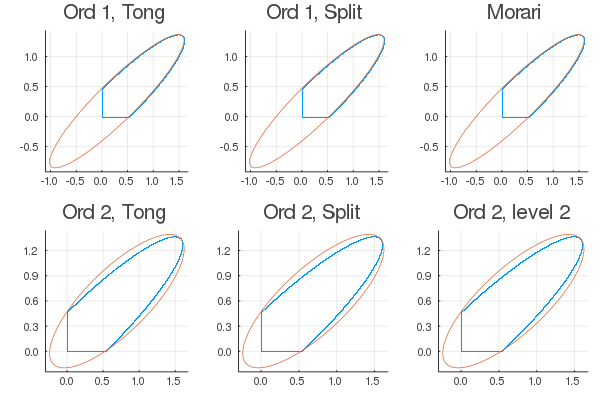

In [108]:
# plot original graph and image under ReLU
p11 = OuterApproximationPlotSampling(Q01, b01, c01, 1, P1, ξ1, "tong", L1);
p12 = OuterApproximationPlotSampling(Q01, b01, c01, 2, P1, ξ1, "tong", L1);
p21 = OuterApproximationPlotSampling(Q01, b01, c01, 1, P1, ξ1, "split", L1);
p22 = OuterApproximationPlotSampling(Q01, b01, c01, 2, P1, ξ1, "split", L1);
p31 = OuterApproximationPlotSampling(Q01, b01, c01, 1, P1, ξ1, "Morari", L1);
p32 = OuterApproximationPlotSampling(Q01, b01, c01, 2, P1, ξ1, "sublevel", L1, 2);

plot(p11, p21, p31, p12, p22, p32, layout = grid(2,3), fmt = :png)

## 3-hidden layer networks of type (2,2,2,2)

In [48]:
Q0 = [-1 0; 0 -1]; b0 = [0; 0]; c0 = 1;
L = 3; P = Array{Any}(undef, L); ξ = Array{Any}(undef, L);
for i = 1:L
    P[i] = rand(2,2); ξ[i] = rand(2,1); P[i][1,1] = 1; P[i][2,2] = 1
end
# P = Array{Any}(undef, 1); ξ = Array{Any}(undef, 1);
# P[1] = [0.3635506286447585 0.7093402795431689; 0.9196700104032225 0.1617946634378744];
# ξ[1] = [0.6962832639488288; 0.14313309497346638];

In [53]:
# # println(P[1]); println(ξ[1])
# k = 1
# # plot original graph and image under ReLU
# θ = 0:0.1:2*π+0.1
# F0 = eigen(Q0); T0 = F0.vectors; Γ0 = diagm(sqrt.(-F0.values));
# v0 = -1/2 * Q0^(-1) * b0; m0 = c0 - v0'*Q0*v0
# # x11 = (P[1]*(sqrt(m0)*T0*Γ0^(-1)*[cos.(θ)'; sin.(θ)'].+v0).+ξ[1])[1,:]
# x11 = (sqrt(m0)*T0*Γ0^(-1)*[cos.(θ)'; sin.(θ)'].+v0)[1,:];
# # x21 = (P[1]*(sqrt(m0)*T0*Γ0^(-1)*[cos.(θ)'; sin.(θ)'].+v0).+ξ[1])[2,:]
# x21 = (sqrt(m0)*T0*Γ0^(-1)*[cos.(θ)'; sin.(θ)'].+v0)[2,:];
# x12 = (P[1]*(sqrt(m0)*T0*Γ0^(-1)*[cos.(θ)'; sin.(θ)'].+v0).+ξ[1])[1,:] .* ((P[1]*(sqrt(m0)*T0*Γ0^(-1)*[cos.(θ)'; sin.(θ)'].+v0).+ξ[1])[1,:] .>= 0); 
# x22 = (P[1]*(sqrt(m0)*T0*Γ0^(-1)*[cos.(θ)'; sin.(θ)'].+v0).+ξ[1])[2,:] .* ((P[1]*(sqrt(m0)*T0*Γ0^(-1)*[cos.(θ)'; sin.(θ)'].+v0).+ξ[1])[2,:] .>= 0); 
# x1 = [x11 x12]; x2 = [x21 x22]; p = Array{Any}(undef, k)
# p[1] = plot(x1, x2, title = "Input -> Layer 1", label = ["InpEllip" "Lay1Ellip"], legend=false)#:outertopright)
# for i = 2:k
#     x1 = x12; x2 = x22;
#     X = [x12'; x22']
#     x12 = (P[i]*X.+ξ[i])[1,:] .* ((P[i]*X.+ξ[i])[1,:] .>= 0); 
#     x22 = (P[i]*X.+ξ[i])[2,:] .* ((P[i]*X.+ξ[i])[2,:] .>= 0); 
#     x1 = hcat(x1, x12); x2 = hcat(x2, x22)
#     p[i] = plot(x1, x2, title = "Layer $(i-1) -> Layer $(i)", label = ["Lay$(i-1)Ellip" "Lay$(i)Ellip"], legend=false)#:outertopright)
# end

# p11 = OuterApproximationPlotSampling(Q0, b0, c0, 1, P, ξ, "tong", k);
# p12 = OuterApproximationPlotSampling(Q0, b0, c0, 2, P, ξ, "tong", k);
# # p21 = OuterApproximationPlotSampling(Q0, b0, c0, 1, P, ξ, "jean", k);
# # p22 = OuterApproximationPlotSampling(Q0, b0, c0, 2, P, ξ, "jean", k);
# p21 = OuterApproximationPlotSampling(Q0, b0, c0, 1, P, ξ, "", k);
# p22 = plot();
# p31 = OuterApproximationPlotSampling(Q0, b0, c0, 1, P, ξ, "split", k);
# p32 = OuterApproximationPlotSampling(Q0, b0, c0, 2, P, ξ, "split", k);

# plot(p[1], p11, p21, p31, p12, p22, p32, layout = @layout[grid(1,1);grid(2,3)], fmt = :png)

In [54]:
# # println(P[2]); println(ξ[2])
# k = 2
# # plot original graph and image under ReLU
# θ = 0:0.1:2*π+0.1
# F0 = eigen(Q0); T0 = F0.vectors; Γ0 = diagm(sqrt.(-F0.values));
# v0 = -1/2 * Q0^(-1) * b0; m0 = c0 - v0'*Q0*v0
# # x11 = (P[1]*(sqrt(m0)*T0*Γ0^(-1)*[cos.(θ)'; sin.(θ)'].+v0).+ξ[1])[1,:]
# x11 = (sqrt(m0)*T0*Γ0^(-1)*[cos.(θ)'; sin.(θ)'].+v0)[1,:]; x1 = x11
# # x21 = (P[1]*(sqrt(m0)*T0*Γ0^(-1)*[cos.(θ)'; sin.(θ)'].+v0).+ξ[1])[2,:]
# x21 = (sqrt(m0)*T0*Γ0^(-1)*[cos.(θ)'; sin.(θ)'].+v0)[2,:]; x2 = x21
# x12 = (P[1]*(sqrt(m0)*T0*Γ0^(-1)*[cos.(θ)'; sin.(θ)'].+v0).+ξ[1])[1,:] .* ((P[1]*(sqrt(m0)*T0*Γ0^(-1)*[cos.(θ)'; sin.(θ)'].+v0).+ξ[1])[1,:] .>= 0); 
# x22 = (P[1]*(sqrt(m0)*T0*Γ0^(-1)*[cos.(θ)'; sin.(θ)'].+v0).+ξ[1])[2,:] .* ((P[1]*(sqrt(m0)*T0*Γ0^(-1)*[cos.(θ)'; sin.(θ)'].+v0).+ξ[1])[2,:] .>= 0); 
# x1 = [x11 x12]; x2 = [x21 x22]; p = Array{Any}(undef, k)
# p[1] = plot(x1, x2, title = "Input -> Layer 1", label = ["InpEllip" "Lay1Ellip"], legend=false)#:outertopright)
# for i = 2:k
#     x1 = x12; x2 = x22;
#     X = [x12'; x22']
#     x12 = (P[i]*X.+ξ[i])[1,:] .* ((P[i]*X.+ξ[i])[1,:] .>= 0); 
#     x22 = (P[i]*X.+ξ[i])[2,:] .* ((P[i]*X.+ξ[i])[2,:] .>= 0); 
#     x1 = hcat(x1, x12); x2 = hcat(x2, x22)
#     p[i] = plot(x1, x2, title = "Layer $(i-1) -> Layer $(i)", label = ["Lay$(i-1)Ellip" "Lay$(i)Ellip"], legend=false)#:outertopright)
# end

# p11 = OuterApproximationPlotSampling(Q0, b0, c0, 1, P, ξ, "tong", k);
# p12 = OuterApproximationPlotSampling(Q0, b0, c0, 2, P, ξ, "tong", k);
# # p21 = OuterApproximationPlotSampling(Q0, b0, c0, 1, P, ξ, "jean", k);
# # p22 = OuterApproximationPlotSampling(Q0, b0, c0, 2, P, ξ, "jean", k);
# p21 = OuterApproximationPlotSampling(Q0, b0, c0, 1, P, ξ, "", k);
# p22 = plot();
# p31 = OuterApproximationPlotSampling(Q0, b0, c0, 1, P, ξ, "split", k);
# p32 = OuterApproximationPlotSampling(Q0, b0, c0, 2, P, ξ, "split", k);

# plot(p[1], p[2], p11, p21, p31, p12, p22, p32, layout = @layout[grid(1,2);grid(2,3)], fmt = :png)

Termination status: OPTIMAL, primal status: FEASIBLE_POINT, dual status: FEASIBLE_POINT.
Termination status: OPTIMAL, primal status: FEASIBLE_POINT, dual status: FEASIBLE_POINT.
Termination status: OPTIMAL, primal status: FEASIBLE_POINT, dual status: FEASIBLE_POINT.
Termination status: OPTIMAL, primal status: FEASIBLE_POINT, dual status: FEASIBLE_POINT.
Termination status: OPTIMAL, primal status: FEASIBLE_POINT, dual status: FEASIBLE_POINT.
Termination status: OPTIMAL, primal status: FEASIBLE_POINT, dual status: FEASIBLE_POINT.
Termination status: OPTIMAL, primal status: FEASIBLE_POINT, dual status: FEASIBLE_POINT.
Termination status: OPTIMAL, primal status: FEASIBLE_POINT, dual status: FEASIBLE_POINT.
Termination status: OPTIMAL, primal status: FEASIBLE_POINT, dual status: FEASIBLE_POINT.
Termination status: OPTIMAL, primal status: FEASIBLE_POINT, dual status: FEASIBLE_POINT.
Termination status: OPTIMAL, primal status: FEASIBLE_POINT, dual status: FEASIBLE_POINT.
Termination status: O

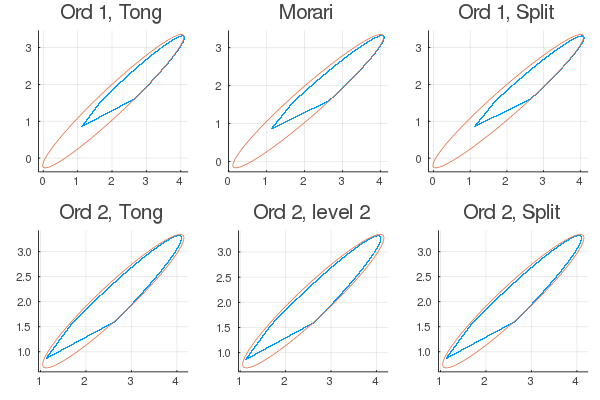

In [72]:
# println(P[3]); println(ξ[3])
k = 3
# # plot original graph and image under ReLU
# θ = 0:0.1:2*π+0.1
# F0 = eigen(Q0); T0 = F0.vectors; Γ0 = diagm(sqrt.(-F0.values));
# v0 = -1/2 * Q0^(-1) * b0; m0 = c0 - v0'*Q0*v0
# # x11 = (P[i]*(sqrt(m0)*T0*Γ0^(-1)*[cos.(θ)'; sin.(θ)'].+v0).+ξ[i])[1,:]
# x11 = (sqrt(m0)*T0*Γ0^(-1)*[cos.(θ)'; sin.(θ)'].+v0)[1,:]
# # x21 = (P[i]*(sqrt(m0)*T0*Γ0^(-1)*[cos.(θ)'; sin.(θ)'].+v0).+ξ[i])[2,:]
# x21 = (sqrt(m0)*T0*Γ0^(-1)*[cos.(θ)'; sin.(θ)'].+v0)[2,:]
# x12 = (P[1]*(sqrt(m0)*T0*Γ0^(-1)*[cos.(θ)'; sin.(θ)'].+v0).+ξ[1])[1,:] .* ((P[1]*(sqrt(m0)*T0*Γ0^(-1)*[cos.(θ)'; sin.(θ)'].+v0).+ξ[1])[1,:] .>= 0); 
# x22 = (P[1]*(sqrt(m0)*T0*Γ0^(-1)*[cos.(θ)'; sin.(θ)'].+v0).+ξ[1])[2,:] .* ((P[1]*(sqrt(m0)*T0*Γ0^(-1)*[cos.(θ)'; sin.(θ)'].+v0).+ξ[1])[2,:] .>= 0); 
# x1 = [x11 x12]; x2 = [x21 x22]; p = Array{Any}(undef, k)
# p[1] = plot(x1, x2, title = "Input -> Layer 1", label = ["InpEllip" "Lay1Ellip"], legend=false)#:outertopright)
# for i = 2:k
#     x1 = x12; x2 = x22;
#     X = [x12'; x22']
#     x12 = (P[i]*X.+ξ[i])[1,:] .* ((P[i]*X.+ξ[i])[1,:] .>= 0); 
#     x22 = (P[i]*X.+ξ[i])[2,:] .* ((P[i]*X.+ξ[i])[2,:] .>= 0); 
#     x1 = hcat(x1, x12); x2 = hcat(x2, x22)
#     p[i] = plot(x1, x2, title = "Layer $(i-1) -> Layer $(i)", label = ["Lay$(i-1)Ellip" "Lay$(i)Ellip"], legend=false)#:outertopright)
# end

p11 = OuterApproximationPlotSampling(Q0, b0, c0, 1, P, ξ, "tong", k);
p12 = OuterApproximationPlotSampling(Q0, b0, c0, 2, P, ξ, "tong", k);
# p21 = OuterApproximationPlotSampling(Q0, b0, c0, 1, P, ξ, "jean", k);
# p22 = OuterApproximationPlotSampling(Q0, b0, c0, 2, P, ξ, "jean", k);
p21 = OuterApproximationPlotSampling(Q0, b0, c0, 1, P, ξ, "Morari", k);
p22 = OuterApproximationPlotSampling(Q0, b0, c0, 2, P, ξ, "sublevel", k, 2);
p31 = OuterApproximationPlotSampling(Q0, b0, c0, 1, P, ξ, "split", k);
p32 = OuterApproximationPlotSampling(Q0, b0, c0, 2, P, ξ, "split", k);

# plot(p[1], p[2], p[3], p11, p21, p31, p12, p22, p32, layout = @layout[grid(1,3);grid(2,3)], fmt = :png)
plot(p11, p21, p31, p12, p22, p32, layout = grid(2,3), fmt = :png)

## 1-hidden layer networks of type (10,2)

In [109]:
n = 10; Q01 = Matrix(-I(n)); b01 = zeros(n,1); c01 = 1;
L1 = 1; P1 = Array{Any}(undef, L1); ξ1 = Array{Any}(undef, L1);
for i = 1:L1-1
    P1[i] = rand(n,n); ξ1[i] = rand(n,1);
    for j = 1:n
        P1[i][j,j] = 1
    end
end
P1[L1] = rand(2,n); ξ1[L1] = rand(2,1); P1[L1][1,1] = 1; P1[L1][2,2] = 1;

Termination status: OPTIMAL, primal status: FEASIBLE_POINT, dual status: FEASIBLE_POINT.
Termination status: OPTIMAL, primal status: FEASIBLE_POINT, dual status: FEASIBLE_POINT.
Termination status: OPTIMAL, primal status: FEASIBLE_POINT, dual status: FEASIBLE_POINT.
Termination status: OPTIMAL, primal status: FEASIBLE_POINT, dual status: FEASIBLE_POINT.
Termination status: OPTIMAL, primal status: FEASIBLE_POINT, dual status: FEASIBLE_POINT.
Termination status: OPTIMAL, primal status: FEASIBLE_POINT, dual status: FEASIBLE_POINT.
Termination status: OPTIMAL, primal status: FEASIBLE_POINT, dual status: FEASIBLE_POINT.
Termination status: SLOW_PROGRESS, primal status: FEASIBLE_POINT, dual status: FEASIBLE_POINT.
Termination status: OPTIMAL, primal status: FEASIBLE_POINT, dual status: FEASIBLE_POINT.


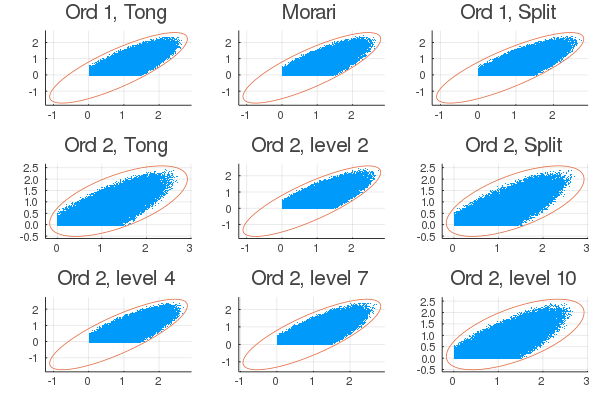

In [110]:
# plot original graph and image under ReLU
p11 = OuterApproximationPlotSampling(Q01, b01, c01, 1, P1, ξ1, "tong", L1);
p12 = OuterApproximationPlotSampling(Q01, b01, c01, 2, P1, ξ1, "tong", L1);
# p21 = OuterApproximationPlotSampling(Q01, b01, c01, 1, P1, ξ1, "jean", L1);
# p22 = OuterApproximationPlotSampling(Q01, b01, c01, 2, P1, ξ1, "jean", L1);
p21 = OuterApproximationPlotSampling(Q01, b01, c01, 1, P1, ξ1, "Morari", L1);
p22 = OuterApproximationPlotSampling(Q01, b01, c01, 2, P1, ξ1, "sublevel", L1, 2);
p31 = OuterApproximationPlotSampling(Q01, b01, c01, 1, P1, ξ1, "split", L1);
p32 = OuterApproximationPlotSampling(Q01, b01, c01, 2, P1, ξ1, "split", L1);
p13 = OuterApproximationPlotSampling(Q01, b01, c01, 2, P1, ξ1, "sublevel", L1, 4);
p23 = OuterApproximationPlotSampling(Q01, b01, c01, 2, P1, ξ1, "sublevel", L1, 7);
p33 = OuterApproximationPlotSampling(Q01, b01, c01, 2, P1, ξ1, "sublevel", L1, 10);

plot(p11, p21, p31, p12, p22, p32, p13, p23, p33, layout = grid(3,3), fmt = :png)

## 2-hidden layer networks of type (2,2,2)

In [75]:
n = 2; Q02 = Matrix(-I(n)); b02 = zeros(n,1); c02 = 1;
L2 = 2; P2 = Array{Any}(undef, L2); ξ2 = Array{Any}(undef, L2);
for i = 1:L2-1
    P2[i] = rand(n,n); ξ2[i] = rand(n,1);
    for j = 1:n
        P2[i][j,j] = 1
    end
end
P2[L2] = rand(2,n); ξ2[L2] = rand(2,1); P2[L2][1,1] = 1; P2[L2][2,2] = 1;

Termination status: OPTIMAL, primal status: FEASIBLE_POINT, dual status: FEASIBLE_POINT.
Termination status: OPTIMAL, primal status: FEASIBLE_POINT, dual status: FEASIBLE_POINT.
Termination status: OPTIMAL, primal status: FEASIBLE_POINT, dual status: FEASIBLE_POINT.
Termination status: OPTIMAL, primal status: FEASIBLE_POINT, dual status: FEASIBLE_POINT.
Termination status: OPTIMAL, primal status: FEASIBLE_POINT, dual status: FEASIBLE_POINT.
Termination status: OPTIMAL, primal status: FEASIBLE_POINT, dual status: FEASIBLE_POINT.
Termination status: OPTIMAL, primal status: FEASIBLE_POINT, dual status: FEASIBLE_POINT.
Termination status: SLOW_PROGRESS, primal status: FEASIBLE_POINT, dual status: FEASIBLE_POINT.
Termination status: OPTIMAL, primal status: FEASIBLE_POINT, dual status: FEASIBLE_POINT.
Termination status: OPTIMAL, primal status: FEASIBLE_POINT, dual status: FEASIBLE_POINT.
Termination status: OPTIMAL, primal status: FEASIBLE_POINT, dual status: FEASIBLE_POINT.
Termination sta

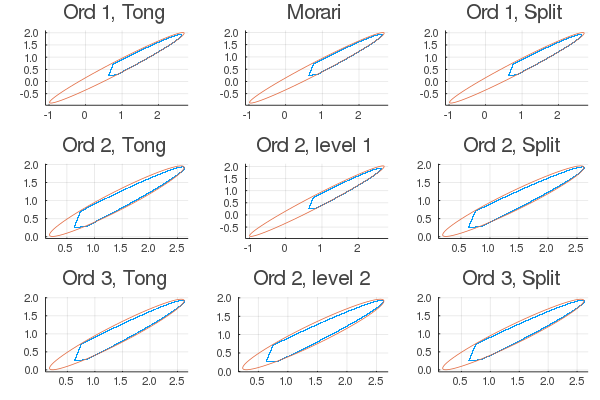

In [100]:
# plot original graph and image under ReLU
p11 = OuterApproximationPlotSampling(Q02, b02, c02, 1, P2, ξ2, "tong", L2);
# p21 = OuterApproximationPlotSampling(Q02, b02, c02, 1, P2, ξ2, "jean", L2);
p21 = OuterApproximationPlotSampling(Q02, b02, c02, 1, P2, ξ2, "Morari", L2);
p31 = OuterApproximationPlotSampling(Q02, b02, c02, 1, P2, ξ2, "split", L2);
p12 = OuterApproximationPlotSampling(Q02, b02, c02, 2, P2, ξ2, "tong", L2);
# p22 = OuterApproximationPlotSampling(Q02, b02, c02, 2, P2, ξ2, "jean", L2);
p22 = OuterApproximationPlotSampling(Q02, b02, c02, 2, P2, ξ2, "sublevel", L2, 1);
p32 = OuterApproximationPlotSampling(Q02, b02, c02, 2, P2, ξ2, "split", L2);
p13 = OuterApproximationPlotSampling(Q02, b02, c02, 3, P2, ξ2, "tong", L2);
# p23 = OuterApproximationPlotSampling(Q02, b02, c02, 3, P2, ξ2, "jean", L2);
p23 = OuterApproximationPlotSampling(Q02, b02, c02, 2, P2, ξ2, "sublevel", L2, 2);
p33 = OuterApproximationPlotSampling(Q02, b02, c02, 3, P2, ξ2, "split", L2);

plot(p11, p21, p31, p12, p22, p32, p13, p23, p33, layout = grid(3,3), fmt = :png)

## 2-hidden layer networks of type (3,3,2)

In [77]:
n = 3; Q03 = Matrix(-I(n)); b03 = zeros(n,1); c03 = 1;
L3 = 2; P3 = Array{Any}(undef, L3); ξ3 = Array{Any}(undef, L3);
for i = 1:L3-1
    P3[i] = rand(n,n); ξ3[i] = rand(n,1);
    for j = 1:n
        P3[i][j,j] = 1
    end
end
P3[L3] = rand(2,n); ξ3[L3] = rand(2,1); P3[L3][1,1] = 1; P3[L3][2,2] = 1;

Termination status: OPTIMAL, primal status: FEASIBLE_POINT, dual status: FEASIBLE_POINT.
Termination status: SLOW_PROGRESS, primal status: FEASIBLE_POINT, dual status: FEASIBLE_POINT.
Termination status: OPTIMAL, primal status: FEASIBLE_POINT, dual status: FEASIBLE_POINT.
Termination status: OPTIMAL, primal status: FEASIBLE_POINT, dual status: FEASIBLE_POINT.
Termination status: OPTIMAL, primal status: FEASIBLE_POINT, dual status: FEASIBLE_POINT.
Termination status: OPTIMAL, primal status: FEASIBLE_POINT, dual status: FEASIBLE_POINT.
Termination status: SLOW_PROGRESS, primal status: UNKNOWN_RESULT_STATUS, dual status: UNKNOWN_RESULT_STATUS.
Termination status: SLOW_PROGRESS, primal status: FEASIBLE_POINT, dual status: FEASIBLE_POINT.
Termination status: OPTIMAL, primal status: FEASIBLE_POINT, dual status: FEASIBLE_POINT.
Termination status: SLOW_PROGRESS, primal status: FEASIBLE_POINT, dual status: FEASIBLE_POINT.
Termination status: OPTIMAL, primal status: FEASIBLE_POINT, dual status:

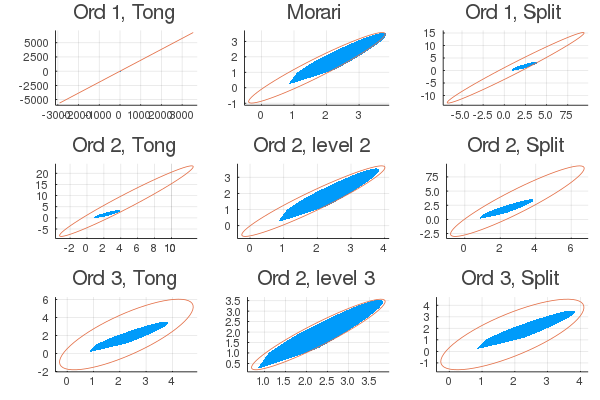

In [99]:
# plot original graph and image under ReLU
p11 = OuterApproximationPlotSampling(Q03, b03, c03, 1, P3, ξ3, "tong", L3);
# p21 = OuterApproximationPlotSampling(Q03, b03, c03, 1, P3, ξ3, "jean", L3);
p21 = OuterApproximationPlotSampling(Q03, b03, c03, 1, P3, ξ3, "Morari", L3);
p31 = OuterApproximationPlotSampling(Q03, b03, c03, 1, P3, ξ3, "split", L3);
p12 = OuterApproximationPlotSampling(Q03, b03, c03, 2, P3, ξ3, "tong", L3);
# p22 = OuterApproximationPlotSampling(Q03, b03, c03, 2, P3, ξ3, "jean", L3);
p22 = OuterApproximationPlotSampling(Q03, b03, c03, 2, P3, ξ3, "sublevel", L3, 2);
p32 = OuterApproximationPlotSampling(Q03, b03, c03, 2, P3, ξ3, "split", L3);
p13 = OuterApproximationPlotSampling(Q03, b03, c03, 3, P3, ξ3, "tong", L3);
# p23 = OuterApproximationPlotSampling(Q03, b03, c03, 3, P3, ξ3, "jean", L3);
p23 = OuterApproximationPlotSampling(Q03, b03, c03, 2, P3, ξ3, "sublevel", L3, 3);
p33 = OuterApproximationPlotSampling(Q03, b03, c03, 3, P3, ξ3, "split", L3);

plot(p11, p21, p31, p12, p22, p32, p13, p23, p33, layout = grid(3,3), fmt = :png)

## 2-hidden layer networks of type (5,5,2)

In [86]:
n = 5; Q05 = Matrix(-I(n)); b05 = zeros(n,1); c05 = 1;
L5 = 2; P5 = Array{Any}(undef, L5); ξ5 = Array{Any}(undef, L5);
for i = 1:L5-1
    P5[i] = rand(n,n); ξ5[i] = rand(n,1);
    for j = 1:n
        P5[i][j,j] = 1
    end
end
P5[L5] = rand(2,n); ξ5[L5] = rand(2,1); P5[L5][1,1] = 1; P5[L5][2,2] = 1;

Termination status: OPTIMAL, primal status: FEASIBLE_POINT, dual status: FEASIBLE_POINT.
Termination status: SLOW_PROGRESS, primal status: FEASIBLE_POINT, dual status: FEASIBLE_POINT.
Termination status: OPTIMAL, primal status: FEASIBLE_POINT, dual status: FEASIBLE_POINT.
Termination status: OPTIMAL, primal status: FEASIBLE_POINT, dual status: FEASIBLE_POINT.
Termination status: OPTIMAL, primal status: FEASIBLE_POINT, dual status: FEASIBLE_POINT.
Termination status: OPTIMAL, primal status: FEASIBLE_POINT, dual status: FEASIBLE_POINT.
Termination status: SLOW_PROGRESS, primal status: UNKNOWN_RESULT_STATUS, dual status: UNKNOWN_RESULT_STATUS.
Termination status: SLOW_PROGRESS, primal status: FEASIBLE_POINT, dual status: FEASIBLE_POINT.
Termination status: OPTIMAL, primal status: FEASIBLE_POINT, dual status: FEASIBLE_POINT.
Termination status: OPTIMAL, primal status: FEASIBLE_POINT, dual status: FEASIBLE_POINT.
Termination status: SLOW_PROGRESS, primal status: FEASIBLE_POINT, dual status:

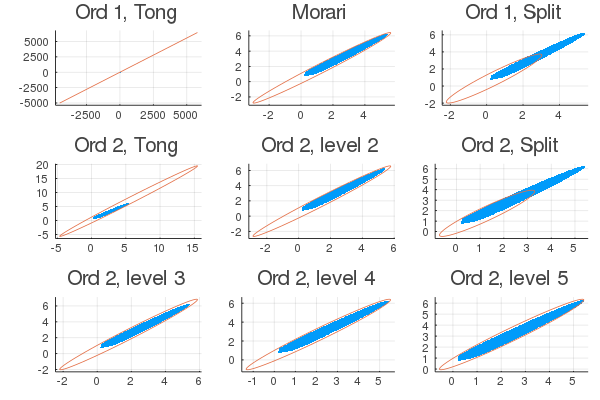

In [101]:
# plot original graph and image under ReLU
p11 = OuterApproximationPlotSampling(Q05, b05, c05, 1, P5, ξ5, "tong", L5);
# p21 = OuterApproximationPlotSampling(Q05, b05, c05, 1, P5, ξ5, "jean", L5);
p21 = OuterApproximationPlotSampling(Q05, b05, c05, 1, P5, ξ5, "Morari", L5);
p31 = OuterApproximationPlotSampling(Q05, b05, c05, 1, P5, ξ5, "split", L5);
p12 = OuterApproximationPlotSampling(Q05, b05, c05, 2, P5, ξ5, "tong", L5);
# p22 = OuterApproximationPlotSampling(Q05, b05, c05, 2, P5, ξ5, "jean", L5);
p22 = OuterApproximationPlotSampling(Q05, b05, c05, 2, P5, ξ5, "sublevel", L5, 2);
p32 = OuterApproximationPlotSampling(Q05, b05, c05, 2, P5, ξ5, "split", L5);
p13 = OuterApproximationPlotSampling(Q05, b05, c05, 2, P5, ξ5, "sublevel", L5, 3);
p23 = OuterApproximationPlotSampling(Q05, b05, c05, 2, P5, ξ5, "sublevel", L5, 4);
p33 = OuterApproximationPlotSampling(Q05, b05, c05, 2, P5, ξ5, "sublevel", L5, 5);

plot(p11, p21, p31, p12, p22, p32, p13, p23, p33, layout = grid(3,3), fmt = :png)

## 2-hidden layer networks of type (7,7,2)

In [90]:
n = 7; Q07 = Matrix(-I(n)); b07 = zeros(n,1); c07 = 1;
L7 = 2; P7 = Array{Any}(undef, L7); ξ7 = Array{Any}(undef, L7);
for i = 1:L7-1
    P7[i] = rand(n,n); ξ7[i] = rand(n,1);
    for j = 1:n
        P7[i][j,j] = 1
    end
end
P7[L7] = rand(2,n); ξ7[L7] = rand(2,1); P7[L7][1,1] = 1; P7[L7][2,2] = 1;

Termination status: OPTIMAL, primal status: FEASIBLE_POINT, dual status: FEASIBLE_POINT.
Termination status: OPTIMAL, primal status: FEASIBLE_POINT, dual status: FEASIBLE_POINT.
Termination status: OPTIMAL, primal status: FEASIBLE_POINT, dual status: FEASIBLE_POINT.
Termination status: OPTIMAL, primal status: FEASIBLE_POINT, dual status: FEASIBLE_POINT.
Termination status: OPTIMAL, primal status: FEASIBLE_POINT, dual status: FEASIBLE_POINT.
Termination status: OPTIMAL, primal status: FEASIBLE_POINT, dual status: FEASIBLE_POINT.
Termination status: SLOW_PROGRESS, primal status: UNKNOWN_RESULT_STATUS, dual status: UNKNOWN_RESULT_STATUS.
Termination status: SLOW_PROGRESS, primal status: FEASIBLE_POINT, dual status: FEASIBLE_POINT.
Termination status: OPTIMAL, primal status: FEASIBLE_POINT, dual status: FEASIBLE_POINT.
Termination status: SLOW_PROGRESS, primal status: FEASIBLE_POINT, dual status: FEASIBLE_POINT.
Termination status: SLOW_PROGRESS, primal status: FEASIBLE_POINT, dual status:

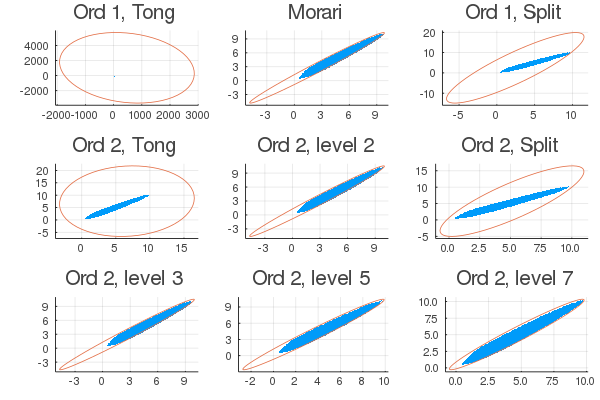

In [103]:
# plot original graph and image under ReLU
p11 = OuterApproximationPlotSampling(Q07, b07, c07, 1, P7, ξ7, "tong", L7);
# p21 = OuterApproximationPlotSampling(Q07, b07, c07, 1, P7, ξ7, "jean", L7);
p21 = OuterApproximationPlotSampling(Q07, b07, c07, 1, P7, ξ7, "Morari", L7);
p31 = OuterApproximationPlotSampling(Q07, b07, c07, 1, P7, ξ7, "split", L7);
p12 = OuterApproximationPlotSampling(Q07, b07, c07, 2, P7, ξ7, "tong", L7);
# p22 = OuterApproximationPlotSampling(Q07, b07, c07, 2, P7, ξ7, "jean", L7);
p22 = OuterApproximationPlotSampling(Q07, b07, c07, 2, P7, ξ7, "sublevel", L7, 2);
p32 = OuterApproximationPlotSampling(Q07, b07, c07, 2, P7, ξ7, "split", L7);
p13 = OuterApproximationPlotSampling(Q07, b07, c07, 2, P7, ξ7, "sublevel", L7, 3);
p23 = OuterApproximationPlotSampling(Q07, b07, c07, 2, P7, ξ7, "sublevel", L7, 5);
p33 = OuterApproximationPlotSampling(Q07, b07, c07, 2, P7, ξ7, "sublevel", L7, 7);

plot(p11, p21, p31, p12, p22, p32, p13, p23, p33, layout = grid(3,3), fmt = :png)

In [16]:
# b = [1; 0]; Q0 = [-1 0; 0 -1/4]; b0 = -2*Q0*b; c0 = 1 + b'*Q0*b;

# # plot original graph and image under ReLU
# θ = 0:0.1:2*π+0.1
# F0 = eigen(Q0); P0 = F0.vectors; Γ0 = diagm(sqrt.(-F0.values));
# v0 = -1/2 * Q0^(-1) * b0; m0 = c0 - v0'*Q0*v0
# x11 = (sqrt(m0)*P0*Γ0^(-1)*[cos.(θ)'; sin.(θ)'].+v0)[1,:]
# x12 = (sqrt(m0)*P0*Γ0^(-1)*[cos.(θ)'; sin.(θ)'].+v0)[1,:] .* ((sqrt(m0)*P0*Γ0^(-1)*[cos.(θ)'; sin.(θ)'].+v0)[1,:] .>= 0); 
# x21 = (sqrt(m0)*P0*Γ0^(-1)*[cos.(θ)'; sin.(θ)'].+v0)[2,:] 
# x22 = (sqrt(m0)*P0*Γ0^(-1)*[cos.(θ)'; sin.(θ)'].+v0)[2,:] .* ((sqrt(m0)*P0*Γ0^(-1)*[cos.(θ)'; sin.(θ)'].+v0)[2,:] .>= 0); 
# x1 = [x11 x12]; x2 = [x21 x22];
# p0 = plot(x1, x2, title = "Ellipsoid and its image by ReLU", label = ["Original Ellipsoid" "Image by ReLU"], legend=:outertopright)

# # plot image under ReLU and its 1st order approximation
# coeff1 = OuterApproximation(Q0, b0, c0, 1)
# Q1 = [coeff1[1] coeff1[2]/2; coeff1[2]/2 coeff1[3]]; b1 = [coeff1[4]; coeff1[5]]; c1 = coeff1[6];
# @printf("Q1 = "); println(Q1); @printf("b1 = "); println(b1);  @printf("c1 = %f\n", c1)
# @printf("Determinant: %f\n", det(-Q1))
# p1 = OuterApproximationPlot(Q0, b0, c0, coeff1, 1);

# # plot image under ReLU and its 2nd order approximation
# coeff2 = OuterApproximation(Q0, b0, c0, 2)
# Q2 = [coeff2[1] coeff2[2]/2; coeff2[2]/2 coeff2[3]]; b2 = [coeff2[4]; coeff2[5]]; c2 = coeff2[6];
# @printf("Q2 = "); println(Q2); @printf("b2 = "); println(b2);  @printf("c2 = %f\n", c2)
# @printf("Determinant: %f\n", det(-Q2))
# p2 = OuterApproximationPlot(Q0, b0, c0, coeff2, 2);
# plot(p0, p1, p2, layout = grid(3, 1), xlims = (-.5,2.5), ylims = (-2.5,2.5))

In [17]:
# b = [1; 2]; Q0 = [-1 0; 0 -1/4]; b0 = -2*Q0*b; c0 = 1 + b'*Q0*b;

# # plot original graph and image under ReLU
# θ = 0:0.1:2*π+0.1
# F0 = eigen(Q0); P0 = F0.vectors; Γ0 = diagm(sqrt.(-F0.values));
# v0 = -1/2 * Q0^(-1) * b0; m0 = c0 - v0'*Q0*v0
# x11 = (sqrt(m0)*P0*Γ0^(-1)*[cos.(θ)'; sin.(θ)'].+v0)[1,:]
# x12 = (sqrt(m0)*P0*Γ0^(-1)*[cos.(θ)'; sin.(θ)'].+v0)[1,:] .* ((sqrt(m0)*P0*Γ0^(-1)*[cos.(θ)'; sin.(θ)'].+v0)[1,:] .>= 0); 
# x21 = (sqrt(m0)*P0*Γ0^(-1)*[cos.(θ)'; sin.(θ)'].+v0)[2,:] 
# x22 = (sqrt(m0)*P0*Γ0^(-1)*[cos.(θ)'; sin.(θ)'].+v0)[2,:] .* ((sqrt(m0)*P0*Γ0^(-1)*[cos.(θ)'; sin.(θ)'].+v0)[2,:] .>= 0); 
# x1 = [x11 x12]; x2 = [x21 x22];
# p0 = plot(x1, x2, title = "Ellipsoid and its image by ReLU", label = ["Original Ellipsoid" "Image by ReLU"], legend=:outertopright)

# # plot image under ReLU and its 1st order approximation
# coeff1 = OuterApproximation(Q0, b0, c0, 1)
# Q1 = [coeff1[1] coeff1[2]/2; coeff1[2]/2 coeff1[3]]; b1 = [coeff1[4]; coeff1[5]]; c1 = coeff1[6];
# @printf("Q1 = "); println(Q1); @printf("b1 = "); println(b1);  @printf("c1 = %f\n", c1)
# @printf("Determinant: %f\n", det(-Q1))
# p1 = OuterApproximationPlot(Q0, b0, c0, coeff1, 1);

# # plot image under ReLU and its 2nd order approximation
# coeff2 = OuterApproximation(Q0, b0, c0, 2)
# Q2 = [coeff2[1] coeff2[2]/2; coeff2[2]/2 coeff2[3]]; b2 = [coeff2[4]; coeff2[5]]; c2 = coeff2[6];
# @printf("Q2 = "); println(Q2); @printf("b2 = "); println(b2);  @printf("c2 = %f\n", c2)
# @printf("Determinant: %f\n", det(-Q2))
# p2 = OuterApproximationPlot(Q0, b0, c0, coeff2, 2);
# plot(p0, p1, p2, layout = grid(3, 1), xlims = (-.5,2.5), ylims = (-.5,4.5))

In [18]:
# b = [0; 2]; Q0 = [-1 0; 0 -1/4]; b0 = -2*Q0*b; c0 = 1 + b'*Q0*b;

# # plot original graph and image under ReLU
# θ = 0:0.1:2*π+0.1
# F0 = eigen(Q0); P0 = F0.vectors; Γ0 = diagm(sqrt.(-F0.values));
# v0 = -1/2 * Q0^(-1) * b0; m0 = c0 - v0'*Q0*v0
# x11 = (sqrt(m0)*P0*Γ0^(-1)*[cos.(θ)'; sin.(θ)'].+v0)[1,:]
# x12 = (sqrt(m0)*P0*Γ0^(-1)*[cos.(θ)'; sin.(θ)'].+v0)[1,:] .* ((sqrt(m0)*P0*Γ0^(-1)*[cos.(θ)'; sin.(θ)'].+v0)[1,:] .>= 0); 
# x21 = (sqrt(m0)*P0*Γ0^(-1)*[cos.(θ)'; sin.(θ)'].+v0)[2,:] 
# x22 = (sqrt(m0)*P0*Γ0^(-1)*[cos.(θ)'; sin.(θ)'].+v0)[2,:] .* ((sqrt(m0)*P0*Γ0^(-1)*[cos.(θ)'; sin.(θ)'].+v0)[2,:] .>= 0); 
# x1 = [x11 x12]; x2 = [x21 x22];
# p0 = plot(x1, x2, title = "Ellipsoid and its image by ReLU", label = ["Original Ellipsoid" "Image by ReLU"], legend=:outertopright)

# # plot image under ReLU and its 1st order approximation
# coeff1 = OuterApproximation(Q0, b0, c0, 1)
# Q1 = [coeff1[1] coeff1[2]/2; coeff1[2]/2 coeff1[3]]; b1 = [coeff1[4]; coeff1[5]]; c1 = coeff1[6];
# @printf("Q1 = "); println(Q1); @printf("b1 = "); println(b1);  @printf("c1 = %f\n", c1)
# @printf("Determinant: %f\n", det(-Q1))
# p1 = OuterApproximationPlot(Q0, b0, c0, coeff1, 1);

# # plot image under ReLU and its 2nd order approximation
# coeff2 = OuterApproximation(Q0, b0, c0, 2)
# Q2 = [coeff2[1] coeff2[2]/2; coeff2[2]/2 coeff2[3]]; b2 = [coeff2[4]; coeff2[5]]; c2 = coeff2[6];
# @printf("Q2 = "); println(Q2); @printf("b2 = "); println(b2);  @printf("c2 = %f\n", c2)
# @printf("Determinant: %f\n", det(-Q2))
# p2 = OuterApproximationPlot(Q0, b0, c0, coeff2, 2);
# plot(p0, p1, p2, layout = grid(3, 1), xlims = (-1.5,1.5), ylims = (-.5,4.5))

In [19]:
# b = [-1; 2]; Q0 = [-1 0; 0 -1/4]; b0 = -2*Q0*b; c0 = 1 + b'*Q0*b;

# # plot original graph and image under ReLU
# θ = 0:0.1:2*π+0.1
# F0 = eigen(Q0); P0 = F0.vectors; Γ0 = diagm(sqrt.(-F0.values));
# v0 = -1/2 * Q0^(-1) * b0; m0 = c0 - v0'*Q0*v0
# x11 = (sqrt(m0)*P0*Γ0^(-1)*[cos.(θ)'; sin.(θ)'].+v0)[1,:]
# x12 = (sqrt(m0)*P0*Γ0^(-1)*[cos.(θ)'; sin.(θ)'].+v0)[1,:] .* ((sqrt(m0)*P0*Γ0^(-1)*[cos.(θ)'; sin.(θ)'].+v0)[1,:] .>= 0); 
# x21 = (sqrt(m0)*P0*Γ0^(-1)*[cos.(θ)'; sin.(θ)'].+v0)[2,:] 
# x22 = (sqrt(m0)*P0*Γ0^(-1)*[cos.(θ)'; sin.(θ)'].+v0)[2,:] .* ((sqrt(m0)*P0*Γ0^(-1)*[cos.(θ)'; sin.(θ)'].+v0)[2,:] .>= 0); 
# x1 = [x11 x12]; x2 = [x21 x22];
# p0 = plot(x1, x2, title = "Ellipsoid and its image by ReLU", label = ["Original Ellipsoid" "Image by ReLU"], legend=:outertopright)

# # plot image under ReLU and its 1st order approximation
# coeff1 = OuterApproximation(Q0, b0, c0, 1)
# Q1 = [coeff1[1] coeff1[2]/2; coeff1[2]/2 coeff1[3]]; b1 = [coeff1[4]; coeff1[5]]; c1 = coeff1[6];
# @printf("Q1 = "); println(Q1); @printf("b1 = "); println(b1);  @printf("c1 = %f\n", c1)
# @printf("Determinant: %f\n", det(-Q1))
# p1 = OuterApproximationPlot(Q0, b0, c0, coeff1, 1);

# # plot image under ReLU and its 2nd order approximation
# coeff2 = OuterApproximation(Q0, b0, c0, 2)
# Q2 = [coeff2[1] coeff2[2]/2; coeff2[2]/2 coeff2[3]]; b2 = [coeff2[4]; coeff2[5]]; c2 = coeff2[6];
# @printf("Q2 = "); println(Q2); @printf("b2 = "); println(b2);  @printf("c2 = %f\n", c2)
# @printf("Determinant: %f\n", det(-Q2))
# p2 = OuterApproximationPlot(Q0, b0, c0, coeff2, 2);
# plot(p0, p1, p2, layout = grid(3, 1), xlims = (-2.5,1.5), ylims = (-.5,4.5))

In [20]:
# b = [-1; 0]; Q0 = [-1 0; 0 -1/4]; b0 = -2*Q0*b; c0 = 1 + b'*Q0*b;

# # plot original graph and image under ReLU
# θ = 0:0.1:2*π+0.1
# F0 = eigen(Q0); P0 = F0.vectors; Γ0 = diagm(sqrt.(-F0.values));
# v0 = -1/2 * Q0^(-1) * b0; m0 = c0 - v0'*Q0*v0
# x11 = (sqrt(m0)*P0*Γ0^(-1)*[cos.(θ)'; sin.(θ)'].+v0)[1,:]
# x12 = (sqrt(m0)*P0*Γ0^(-1)*[cos.(θ)'; sin.(θ)'].+v0)[1,:] .* ((sqrt(m0)*P0*Γ0^(-1)*[cos.(θ)'; sin.(θ)'].+v0)[1,:] .>= 0); 
# x21 = (sqrt(m0)*P0*Γ0^(-1)*[cos.(θ)'; sin.(θ)'].+v0)[2,:] 
# x22 = (sqrt(m0)*P0*Γ0^(-1)*[cos.(θ)'; sin.(θ)'].+v0)[2,:] .* ((sqrt(m0)*P0*Γ0^(-1)*[cos.(θ)'; sin.(θ)'].+v0)[2,:] .>= 0); 
# x1 = [x11 x12]; x2 = [x21 x22];
# p0 = plot(x1, x2, title = "Ellipsoid and its image by ReLU", label = ["Original Ellipsoid" "Image by ReLU"], legend=:outertopright)

# # plot image under ReLU and its 1st order approximation
# coeff1 = OuterApproximation(Q0, b0, c0, 1)
# Q1 = [coeff1[1] coeff1[2]/2; coeff1[2]/2 coeff1[3]]; b1 = [coeff1[4]; coeff1[5]]; c1 = coeff1[6];
# @printf("Q1 = "); println(Q1); @printf("b1 = "); println(b1);  @printf("c1 = %f\n", c1)
# @printf("Determinant: %f\n", det(-Q1))
# p1 = OuterApproximationPlot(Q0, b0, c0, coeff1, 1);

# # plot image under ReLU and its 2nd order approximation
# coeff2 = OuterApproximation(Q0, b0, c0, 2)
# Q2 = [coeff2[1] coeff2[2]/2; coeff2[2]/2 coeff2[3]]; b2 = [coeff2[4]; coeff2[5]]; c2 = coeff2[6];
# @printf("Q2 = "); println(Q2); @printf("b2 = "); println(b2);  @printf("c2 = %f\n", c2)
# @printf("Determinant: %f\n", det(-Q2))
# p2 = OuterApproximationPlot(Q0, b0, c0, coeff2, 2);
# plot(p0, p1, p2, layout = grid(3, 1), xlims = (-2.5,1.5), ylims = (-2.5,2.5))

In [21]:
# b = [-1; -2]; Q0 = [-1 0; 0 -1/4]; b0 = -2*Q0*b; c0 = 1 + b'*Q0*b;

# # plot original graph and image under ReLU
# θ = 0:0.1:2*π+0.1
# F0 = eigen(Q0); P0 = F0.vectors; Γ0 = diagm(sqrt.(-F0.values));
# v0 = -1/2 * Q0^(-1) * b0; m0 = c0 - v0'*Q0*v0
# x11 = (sqrt(m0)*P0*Γ0^(-1)*[cos.(θ)'; sin.(θ)'].+v0)[1,:]
# x12 = (sqrt(m0)*P0*Γ0^(-1)*[cos.(θ)'; sin.(θ)'].+v0)[1,:] .* ((sqrt(m0)*P0*Γ0^(-1)*[cos.(θ)'; sin.(θ)'].+v0)[1,:] .>= 0); 
# x21 = (sqrt(m0)*P0*Γ0^(-1)*[cos.(θ)'; sin.(θ)'].+v0)[2,:] 
# x22 = (sqrt(m0)*P0*Γ0^(-1)*[cos.(θ)'; sin.(θ)'].+v0)[2,:] .* ((sqrt(m0)*P0*Γ0^(-1)*[cos.(θ)'; sin.(θ)'].+v0)[2,:] .>= 0); 
# x1 = [x11 x12]; x2 = [x21 x22];
# p0 = plot(x1, x2, title = "Ellipsoid and its image by ReLU", label = ["Original Ellipsoid" "Image by ReLU"], legend=:outertopright)

# # plot image under ReLU and its 1st order approximation
# coeff1 = OuterApproximation(Q0, b0, c0, 1)
# Q1 = [coeff1[1] coeff1[2]/2; coeff1[2]/2 coeff1[3]]; b1 = [coeff1[4]; coeff1[5]]; c1 = coeff1[6];
# @printf("Q1 = "); println(Q1); @printf("b1 = "); println(b1);  @printf("c1 = %f\n", c1)
# @printf("Determinant: %f\n", det(-Q1))
# p1 = OuterApproximationPlot(Q0, b0, c0, coeff1, 1);

# # plot image under ReLU and its 2nd order approximation
# coeff2 = OuterApproximation(Q0, b0, c0, 2)
# Q2 = [coeff2[1] coeff2[2]/2; coeff2[2]/2 coeff2[3]]; b2 = [coeff2[4]; coeff2[5]]; c2 = coeff2[6];
# @printf("Q2 = "); println(Q2); @printf("b2 = "); println(b2);  @printf("c2 = %f\n", c2)
# @printf("Determinant: %f\n", det(-Q2))
# p2 = OuterApproximationPlot(Q0, b0, c0, coeff2, 2);
# plot(p0, p1, p2, layout = grid(3, 1), xlims = (-2.5,1.5), ylims = (-4.5,2.5))

In [22]:
# b = [0; -2]; Q0 = [-1 0; 0 -1/4]; b0 = -2*Q0*b; c0 = 1 + b'*Q0*b;

# # plot original graph and image under ReLU
# θ = 0:0.1:2*π+0.1
# F0 = eigen(Q0); P0 = F0.vectors; Γ0 = diagm(sqrt.(-F0.values));
# v0 = -1/2 * Q0^(-1) * b0; m0 = c0 - v0'*Q0*v0
# x11 = (sqrt(m0)*P0*Γ0^(-1)*[cos.(θ)'; sin.(θ)'].+v0)[1,:]
# x12 = (sqrt(m0)*P0*Γ0^(-1)*[cos.(θ)'; sin.(θ)'].+v0)[1,:] .* ((sqrt(m0)*P0*Γ0^(-1)*[cos.(θ)'; sin.(θ)'].+v0)[1,:] .>= 0); 
# x21 = (sqrt(m0)*P0*Γ0^(-1)*[cos.(θ)'; sin.(θ)'].+v0)[2,:] 
# x22 = (sqrt(m0)*P0*Γ0^(-1)*[cos.(θ)'; sin.(θ)'].+v0)[2,:] .* ((sqrt(m0)*P0*Γ0^(-1)*[cos.(θ)'; sin.(θ)'].+v0)[2,:] .>= 0); 
# x1 = [x11 x12]; x2 = [x21 x22];
# p0 = plot(x1, x2, title = "Ellipsoid and its image by ReLU", label = ["Original Ellipsoid" "Image by ReLU"], legend=:outertopright)

# # plot image under ReLU and its 1st order approximation
# coeff1 = OuterApproximation(Q0, b0, c0, 1)
# Q1 = [coeff1[1] coeff1[2]/2; coeff1[2]/2 coeff1[3]]; b1 = [coeff1[4]; coeff1[5]]; c1 = coeff1[6];
# @printf("Q1 = "); println(Q1); @printf("b1 = "); println(b1);  @printf("c1 = %f\n", c1)
# @printf("Determinant: %f\n", det(-Q1))
# p1 = OuterApproximationPlot(Q0, b0, c0, coeff1, 1);

# # plot image under ReLU and its 2nd order approximation
# coeff2 = OuterApproximation(Q0, b0, c0, 2)
# Q2 = [coeff2[1] coeff2[2]/2; coeff2[2]/2 coeff2[3]]; b2 = [coeff2[4]; coeff2[5]]; c2 = coeff2[6];
# @printf("Q2 = "); println(Q2); @printf("b2 = "); println(b2);  @printf("c2 = %f\n", c2)
# @printf("Determinant: %f\n", det(-Q2))
# p2 = OuterApproximationPlot(Q0, b0, c0, coeff2, 2);
# plot(p0, p1, p2, layout = grid(3, 1), xlims = (-1.5,1.5), ylims = (-4.5,2.5))

In [23]:
# b = [1; -2]; Q0 = [-1 0; 0 -1/4]; b0 = -2*Q0*b; c0 = 1 + b'*Q0*b;

# # plot original graph and image under ReLU
# θ = 0:0.1:2*π+0.1
# F0 = eigen(Q0); P0 = F0.vectors; Γ0 = diagm(sqrt.(-F0.values));
# v0 = -1/2 * Q0^(-1) * b0; m0 = c0 - v0'*Q0*v0
# x11 = (sqrt(m0)*P0*Γ0^(-1)*[cos.(θ)'; sin.(θ)'].+v0)[1,:]
# x12 = (sqrt(m0)*P0*Γ0^(-1)*[cos.(θ)'; sin.(θ)'].+v0)[1,:] .* ((sqrt(m0)*P0*Γ0^(-1)*[cos.(θ)'; sin.(θ)'].+v0)[1,:] .>= 0); 
# x21 = (sqrt(m0)*P0*Γ0^(-1)*[cos.(θ)'; sin.(θ)'].+v0)[2,:] 
# x22 = (sqrt(m0)*P0*Γ0^(-1)*[cos.(θ)'; sin.(θ)'].+v0)[2,:] .* ((sqrt(m0)*P0*Γ0^(-1)*[cos.(θ)'; sin.(θ)'].+v0)[2,:] .>= 0); 
# x1 = [x11 x12]; x2 = [x21 x22];
# p0 = plot(x1, x2, title = "Ellipsoid and its image by ReLU", label = ["Original Ellipsoid" "Image by ReLU"], legend=:outertopright)

# # plot image under ReLU and its 1st order approximation
# coeff1 = OuterApproximation(Q0, b0, c0, 1)
# Q1 = [coeff1[1] coeff1[2]/2; coeff1[2]/2 coeff1[3]]; b1 = [coeff1[4]; coeff1[5]]; c1 = coeff1[6];
# @printf("Q1 = "); println(Q1); @printf("b1 = "); println(b1);  @printf("c1 = %f\n", c1)
# @printf("Determinant: %f\n", det(-Q1))
# p1 = OuterApproximationPlot(Q0, b0, c0, coeff1, 1);

# # plot image under ReLU and its 2nd order approximation
# coeff2 = OuterApproximation(Q0, b0, c0, 2)
# Q2 = [coeff2[1] coeff2[2]/2; coeff2[2]/2 coeff2[3]]; b2 = [coeff2[4]; coeff2[5]]; c2 = coeff2[6];
# @printf("Q2 = "); println(Q2); @printf("b2 = "); println(b2);  @printf("c2 = %f\n", c2)
# @printf("Determinant: %f\n", det(-Q2))
# p2 = OuterApproximationPlot(Q0, b0, c0, coeff2, 2);
# plot(p0, p1, p2, layout = grid(3, 1), xlims = (-.5,2.5), ylims = (-4.5,2.5))